# HOUSING: PRICE PREDICTION
----

## Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
  - Which variables are important to predict the price of variable?
  - How do these variables describe the price of the house?

## Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

# Importing Required Liabraries

In [1]:
# Importing Liabraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Data and converting it to DataFrame

### Importing Train Data

In [2]:
# Importing train data and converting it to Dataframe
train = pd.read_csv('train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

### Importing Test Data

In [3]:
# Importing test data and converting it to Dataframe
test = pd.read_csv('test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

### Checking Shape of both datasets

In [4]:
# Checking shape of Train dataset
print (train.shape, '= Train')

# Checking shape of Test dataset
print (test.shape, '= Test')

(1168, 81) = Train
(292, 80) = Test


### Checking columns of both datasets

In [5]:
print ('Columns of Train Data')
print ('='*20)
print (train.columns)
print ('\n')
print ('Columns of Test Data')
print ('='*20)
print (test.columns)

Columns of Train Data
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

### Points Noted 
1.	We have imported 2 data sets one of train and other of test. 
2. Our **train** data contain 1168 rows and 81 columns and **test** data contain 292 rows and 80 columns. 
3.	We will further analyse these datasets.
4. Currently we an see that our **train** data have both target column (SalePrice) as well as feature columns, however **test** data only have feature columns. 
5.	We have to predict SalePrice for **test** dataset.Our Datasets have both categorical as well as numerical columns.
6.	As our target columns have continuous data so this is a regression problem.
7.  Column names of both data sets are same.

# Exploring some more information of our dataset/ Data Pre-Processing

# Train Data

### Checking info of train data

In [6]:
# Checking some more information of our data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Checking unique values of Train Dataset

In [7]:
# Checking all Unique Values of Train Dataset
pd.set_option('display.max_rows',None) # Setting max rows to none
train.nunique().to_frame("Unique Values")

Unique Values
Id                      1168
MSSubClass                15
MSZoning                   5
LotFrontage              106
LotArea                  892
Street                     2
Alley                      2
LotShape                   4
LandContour                4
Utilities                  1
LotConfig                  5
LandSlope                  3
Neighborhood              25
Condition1                 9
Condition2                 8
BldgType                   5
HouseStyle                 8
OverallQual               10
OverallCond                9
YearBuilt                110
YearRemodAdd              61
RoofStyle                  6
RoofMatl                   8
Exterior1st               14
Exterior2nd               15
MasVnrType                 4
MasVnrArea               283
ExterQual                  4
ExterCond                  5
Foundation                 6
BsmtQual                   4
BsmtCond                   4
BsmtExposure               4
BsmtFinType1               6
BsmtFinSF1               551
BsmtFinType2               6
BsmtFinSF2               122
BsmtUnfSF                681
TotalBsmtSF              636
Heating                    6
HeatingQC                  5
CentralAir                 2
Electrical                 5
1stFlrSF                 669
2ndFlrSF                 351
LowQualFinSF              21
GrLivArea                746
BsmtFullBath               4
BsmtHalfBath               3
FullBath                   4
HalfBath                   3
BedroomAbvGr               8
KitchenAbvGr               4
KitchenQual                4
TotRmsAbvGrd              12
Functional                 7
Fireplaces                 4
FireplaceQu                5
GarageType                 6
GarageYrBlt               97
GarageFinish               3
GarageCars                 5
GarageArea               392
GarageQual                 5
GarageCond                 5
PavedDrive                 3
WoodDeckSF               244
OpenPorchSF              176
EnclosedPorch            106
3SsnPorch                 18
ScreenPorch               65
PoolArea                   8
PoolQC                     3
Fence                      4
MiscFeature                4
MiscVal                   20
MoSold                    12
YrSold                     5
SaleType                   9
SaleCondition              6
SalePrice                581

### Checking unique value of each column

In [8]:
# Setting minimum rows to 5
pd.set_option('display.max_rows',5)

In [9]:
# Checking value count of each column
for i in train.columns:
    print(train[i].value_counts())
    print('===================================================')

127     1
1391    1
       ..
415     1
617     1
Name: Id, Length: 1168, dtype: int64
20     428
60     244
      ... 
180      6
40       3
Name: MSSubClass, Length: 15, dtype: int64
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
60.0     111
80.0      60
        ... 
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64
9600     21
7200     18
         ..
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64
Pave    1164
Grvl       4
Name: Street, dtype: int64
Grvl    41
Pave    36
Name: Alley, dtype: int64
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
AllPub    1168
Name: Utilities, dtype: int64
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
NAmes      182
CollgCr    118


### Checking null values of train dataset

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

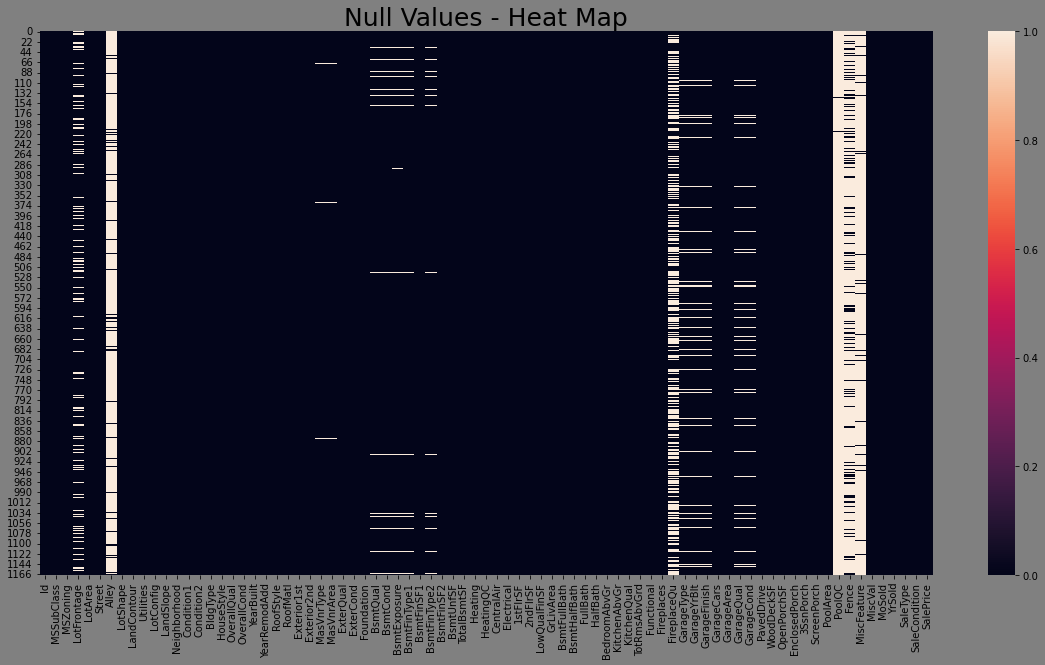

In [10]:
# Checking null values in our dataset
pd.set_option('display.max_rows',None)
print (train.isna().sum())
plt.figure(figsize=[20,10], facecolor = 'grey')
sns.heatmap(train.isnull())
plt.title(("Null Values - Heat Map"), fontsize = 25)
plt.show()

**Out of 81 Columns 18 have null values.**

=========================================================================================================================
### Observations (Train Data)
1. I verified all of the Train dataset's fundamental details, including the amount of rows, columns, and D-types.


2. Our train data set is separated into these data kinds, as can be seen.
dtypes: object(43), int64(35), and float64(3)



3. After that, I looked at the unique values of each column individually and then for all the columns together.


4. I have noted the following points:
- The columns labelled "Id" include all unique values and are not needed for our machine learning model, thus they may be eliminated from our data set.
- Because of their maximum blank values, the columns "Alley," "PoolQC," "FireplaceQu," "Fence," and "MiscFeature" can also be eliminated from our dataset.
- The "Utilities" column, which simply has the value "AllPub," can likewise be deleted.
- The few columns that have the greatest amount of zero values can be deleted as well; these are the columns that contain zero values. (BsmtFinSF2, 1032, LowQualFinSF, 1145, BsmtHalfBath, 1105, EnclosedPorch, 999, 3SsnPorch, 1073, PoolArea, 1161, MiscVal, 1126)


5. Because some of the columns still contain null values, we shall treat those separately using imputation techniques.

### Dropping columns based on above observation.

In [11]:
# Dropping columns bases on above observations.
train.drop(columns = ['Id','Alley', 'PoolQC', 'FireplaceQu', 'Fence' ,'MiscFeature', 'Utilities', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],inplace = True)

In [12]:
# Checking remaining columns of our train dataset
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePri

# Test Data

### Checking info of test data

In [13]:
# Checking some more information of our data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

### Checking unique values of Test Dataset

In [14]:
# Checking all Unique Values of Test Dataset
pd.set_option('display.max_rows',None) # Setting max rows to none
test.nunique().to_frame("Unique Values")

Unique Values
Id                       292
MSSubClass                15
MSZoning                   4
LotFrontage               65
LotArea                  249
Street                     2
Alley                      2
LotShape                   4
LandContour                4
Utilities                  2
LotConfig                  5
LandSlope                  3
Neighborhood              24
Condition1                 8
Condition2                 2
BldgType                   5
HouseStyle                 8
OverallQual                8
OverallCond                7
YearBuilt                 84
YearRemodAdd              57
RoofStyle                  5
RoofMatl                   3
Exterior1st               12
Exterior2nd               14
MasVnrType                 4
MasVnrArea               104
ExterQual                  4
ExterCond                  4
Foundation                 6
BsmtQual                   4
BsmtCond                   3
BsmtExposure               4
BsmtFinType1               6
BsmtFinSF1               184
BsmtFinType2               6
BsmtFinSF2                32
BsmtUnfSF                231
TotalBsmtSF              224
Heating                    4
HeatingQC                  4
CentralAir                 2
Electrical                 4
1stFlrSF                 238
2ndFlrSF                 113
LowQualFinSF               4
GrLivArea                246
BsmtFullBath               3
BsmtHalfBath               2
FullBath                   4
HalfBath                   3
BedroomAbvGr               7
KitchenAbvGr               3
KitchenQual                4
TotRmsAbvGrd              10
Functional                 6
Fireplaces                 3
FireplaceQu                5
GarageType                 6
GarageYrBlt               71
GarageFinish               3
GarageCars                 5
GarageArea               166
GarageQual                 5
GarageCond                 5
PavedDrive                 3
WoodDeckSF                87
OpenPorchSF               92
EnclosedPorch             36
3SsnPorch                  3
ScreenPorch               21
PoolArea                   1
PoolQC                     0
Fence                      4
MiscFeature                2
MiscVal                    8
MoSold                    12
YrSold                     5
SaleType                   6
SaleCondition              4

### Checking unique value of each column

In [15]:
# Setting minimum rows to 5
pd.set_option('display.max_rows',5)

In [16]:
# Checking value count of each column
for i in test.columns:
    print(test[i].value_counts())
    print('===================================================')

337     1
960     1
       ..
973     1
1379    1
Name: Id, Length: 292, dtype: int64
20    108
60     55
     ... 
85      1
40      1
Name: MSSubClass, Length: 15, dtype: int64
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
60.0    32
85.0    14
        ..
36.0     1
69.0     1
Name: LotFrontage, Length: 65, dtype: int64
7200     7
1680     4
        ..
12822    1
1953     1
Name: LotArea, Length: 249, dtype: int64
Pave    290
Grvl      2
Name: Street, dtype: int64
Grvl    9
Pave    5
Name: Alley, dtype: int64
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64
AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64
Inside     210
Corner      41
CulDSac     25
FR2         14
FR3          2
Name: LotConfig, dtype: int64
Gtl    277
Mod     14
Sev      1
Name: LandSlope, dtype: int64
NAmes      43
CollgCr    32
           ..
Veenker     2
NPkVill  

### Checking null values of test dataset

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

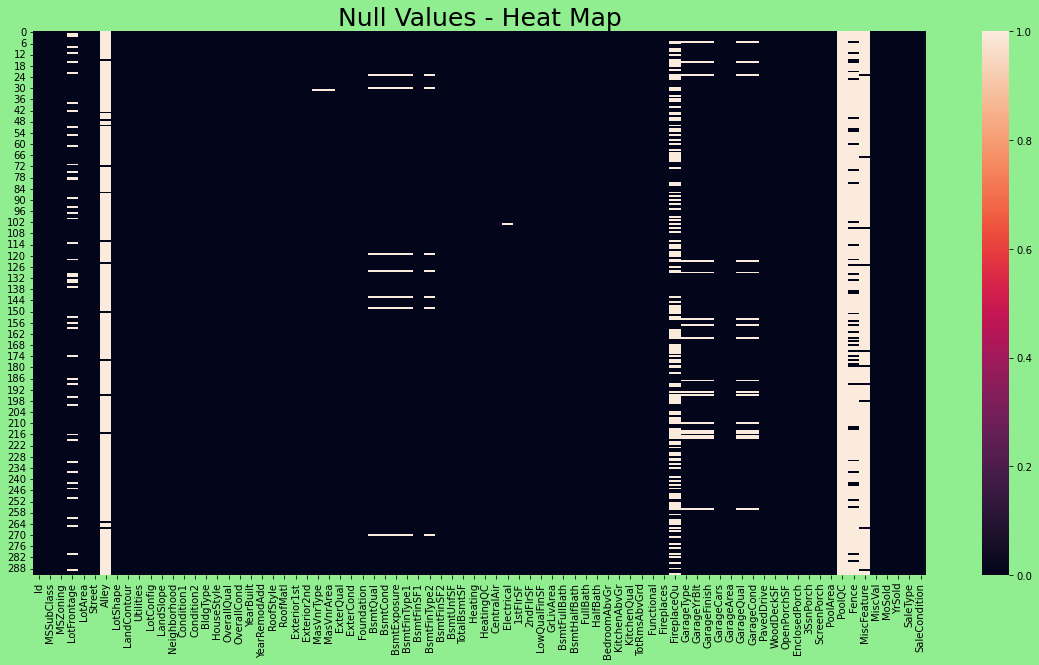

In [17]:
# Checking null values in our dataset
pd.set_option('display.max_rows',None)
print (test.isna().sum())
plt.figure(figsize=[20,10], facecolor = 'lightgreen')
sns.heatmap(test.isnull())
plt.title(("Null Values - Heat Map"), fontsize = 25)
plt.show()

**Out of 81 Columns 18 have null values. This is similar to train data**

=========================================================================================================================
### Observations (Test Data)
1. I verified all of the Test dataset's fundamental details, including the amount of rows, columns, and D-types.


2. It is clear that our test data collection is split into these different data categories.**dtypes: object(42), int64(34), and float64(4)**



3. After that, I looked at the unique values of each column individually and then for all the columns together.


4. I have noted the following points:
- The columns labelled "Id" include all unique values and are not needed for our machine learning model, thus they may be eliminated from our data set.
- Because of their maximum blank values, the columns "Alley," "PoolQC," "FireplaceQu," "Fence," and "MiscFeature" can also be eliminated from our dataset.
- The "Utilities" column, which simply has the value "AllPub," can likewise be deleted.
- The columns with the greatest amount of zero values are a select handful, and since they contain zero values, they may also be eliminated. (EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal6) BsmtFinSF2, LowQualFinSF, BsmtHalfBath,


5. Because some of the columns still contain null values, we shall treat those separately using imputation techniques.


6. Since the observation is nearly identical to the training dataset, we will further delete the aforementioned columns to make the training and test datasets comparable.

### Dropping columns based on above observation.

In [18]:
# Dropping columns bases on above observations.
test.drop(columns = ['Id','Alley', 'PoolQC', 'FireplaceQu', 'Fence' ,'MiscFeature', 'Utilities', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],inplace = True)

In [19]:
# Checking remaining columns of our test dataset
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      d

# Treating Null Values of both Train and Test Data Sets

After above process are now at the statge of filling null values, we will use some imputation techniques to full/treat null values of our both datasets. Earlier there were 18 columns were null values were present, however both datasets are now left with 13 each. Lets begin with Train Dataset.
# 1. Train Dataset - (Treating null values)

### Getting columns with null dataset in one variable.

In [20]:
# Assigning all Categorical columns with null values to one variable.

null_cat = pd.DataFrame(train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
                 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType']])
null_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1138 non-null   object
 1   BsmtCond      1138 non-null   object
 2   BsmtExposure  1137 non-null   object
 3   BsmtFinType1  1138 non-null   object
 4   BsmtFinType2  1137 non-null   object
 5   GarageType    1104 non-null   object
 6   GarageFinish  1104 non-null   object
 7   GarageQual    1104 non-null   object
 8   GarageCond    1104 non-null   object
 9   MasVnrType    1161 non-null   object
dtypes: object(10)
memory usage: 91.4+ KB


In [21]:
# Assigning all continous/numberical columns with null values to other variable.

null_num = pd.DataFrame(train [['LotFrontage', 'GarageYrBlt', 'MasVnrArea']])
null_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  954 non-null    float64
 1   GarageYrBlt  1104 non-null   float64
 2   MasVnrArea   1161 non-null   float64
dtypes: float64(3)
memory usage: 27.5 KB


### Using Mode to impute null values for categorical columns

In [22]:
# Imputing null values using mode
null_cat = train.columns.values
for i in range(0,len(null_cat)):
    if train[null_cat[i]].dtype == "object":
        train[null_cat[i]].fillna(train[null_cat[i]].mode()[0], inplace=True)

### Using Mean to imputer null values for continous/numeric columns

In [23]:
# Imputing null values using mean
null_num = train.columns.values
for i in range(0,len(null_num)):
    if train[null_num[i]].dtype == "float64":
        train[null_num[i]].fillna(train[null_num[i]].mean(), inplace=True)

### Finally checking null values of Train Data

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt 

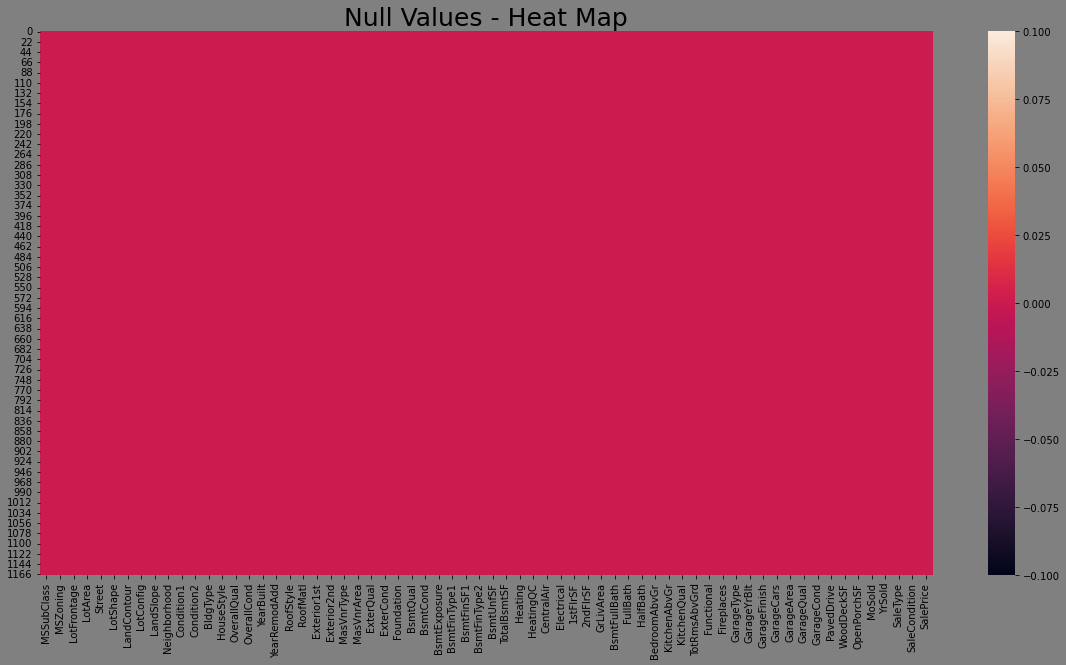

In [24]:
# Checking null values in our train dataset
pd.set_option('display.max_rows',None)
print (train.isna().sum())
plt.figure(figsize=[20,10], facecolor = 'grey')
sns.heatmap(train.isnull())
plt.title(("Null Values - Heat Map"), fontsize = 25)
plt.show()

# 2. Test Dataset - (Treating null values)

### Getting columns with null dataset in one variable.

In [25]:
# Assigning all Categorical columns with null values to one variable.

null_cat = pd.DataFrame(test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
                 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType']])
null_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      285 non-null    object
 1   BsmtCond      285 non-null    object
 2   BsmtExposure  285 non-null    object
 3   BsmtFinType1  285 non-null    object
 4   BsmtFinType2  285 non-null    object
 5   GarageType    275 non-null    object
 6   GarageFinish  275 non-null    object
 7   GarageQual    275 non-null    object
 8   GarageCond    275 non-null    object
 9   MasVnrType    291 non-null    object
dtypes: object(10)
memory usage: 22.9+ KB


In [26]:
# Assigning all continous/numberical columns with null values to other variable.

null_num = pd.DataFrame(test [['LotFrontage', 'GarageYrBlt', 'MasVnrArea']])
null_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  247 non-null    float64
 1   GarageYrBlt  275 non-null    float64
 2   MasVnrArea   291 non-null    float64
dtypes: float64(3)
memory usage: 7.0 KB


### Using Mode to impute null values for categorical columns

In [27]:
# Imputing null values using mode
null_cat = test.columns.values
for i in range(0,len(null_cat)):
    if test[null_cat[i]].dtype == "object":
        test[null_cat[i]].fillna(test[null_cat[i]].mode()[0], inplace=True)

### Using Mean to imputer null values for continous/numeric columns

In [28]:
# Imputing null values using mean
null_num = test.columns.values
for i in range(0,len(null_num)):
    if test[null_num[i]].dtype == "float64":
        test[null_num[i]].fillna(test[null_num[i]].mean(), inplace=True)

### Finally checking of Test Data

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt 

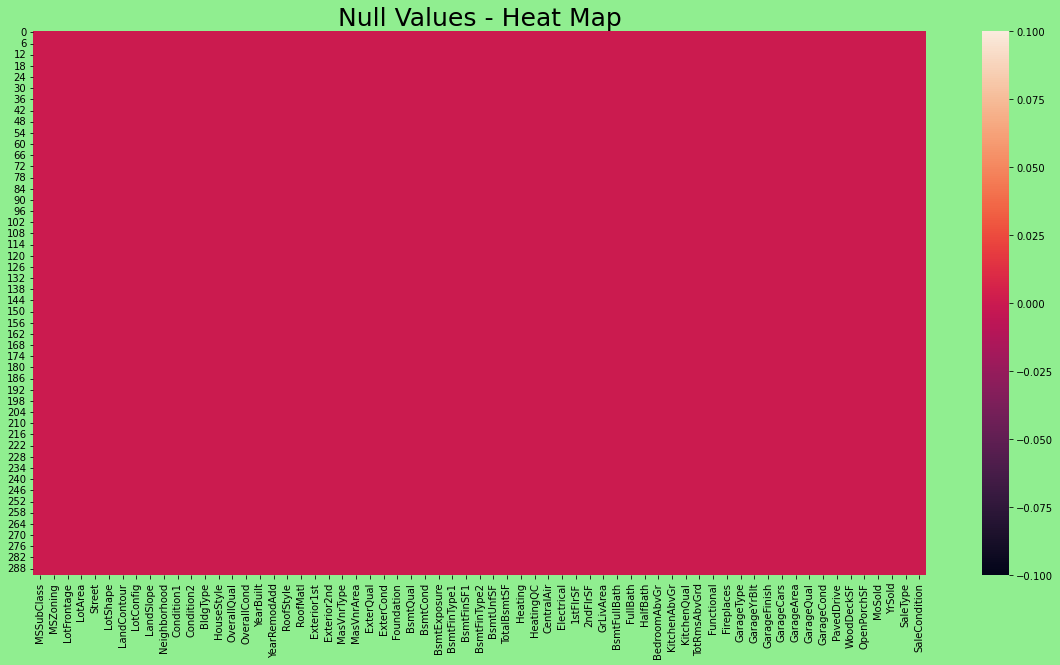

In [29]:
# Checking null values in our test dataset
pd.set_option('display.max_rows',None)
print (test.isna().sum())
plt.figure(figsize=[20,10], facecolor = 'lightgreen')
sns.heatmap(test.isnull())
plt.title(("Null Values - Heat Map"), fontsize = 25)
plt.show()

### Observation

- Both of our datasets currently include no null values.

- We have filled in the blank values in continuous data using the mean approach and the blank values in categorical data using the mode method.

- We will continue working on and visualising the train dataset since it has been sorted and does not include any null values. 

# Exploratory Data Analysis (EDA)

As we have sorted our train and test null values, we will do analysis on our train dataset. We will further use below EDA techniques for our Data Analysis.

- **Univariate Non-graphical**
- **Multivariate Non-graphical**
- **Univariate graphical**
- **Multivariate graphical**

### Seperated all columns as below.

**integer_columns** = 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold'

**object_columns** = 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'
    
**float_columns** = 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'

## Data Visualization - Univariate Graphical

In [30]:
# Column for Categorical columns
cat_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig','LandSlope', 'Condition1', 'Condition2', 'BldgType',
'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'Neighborhood']

## Ploting categorical columns

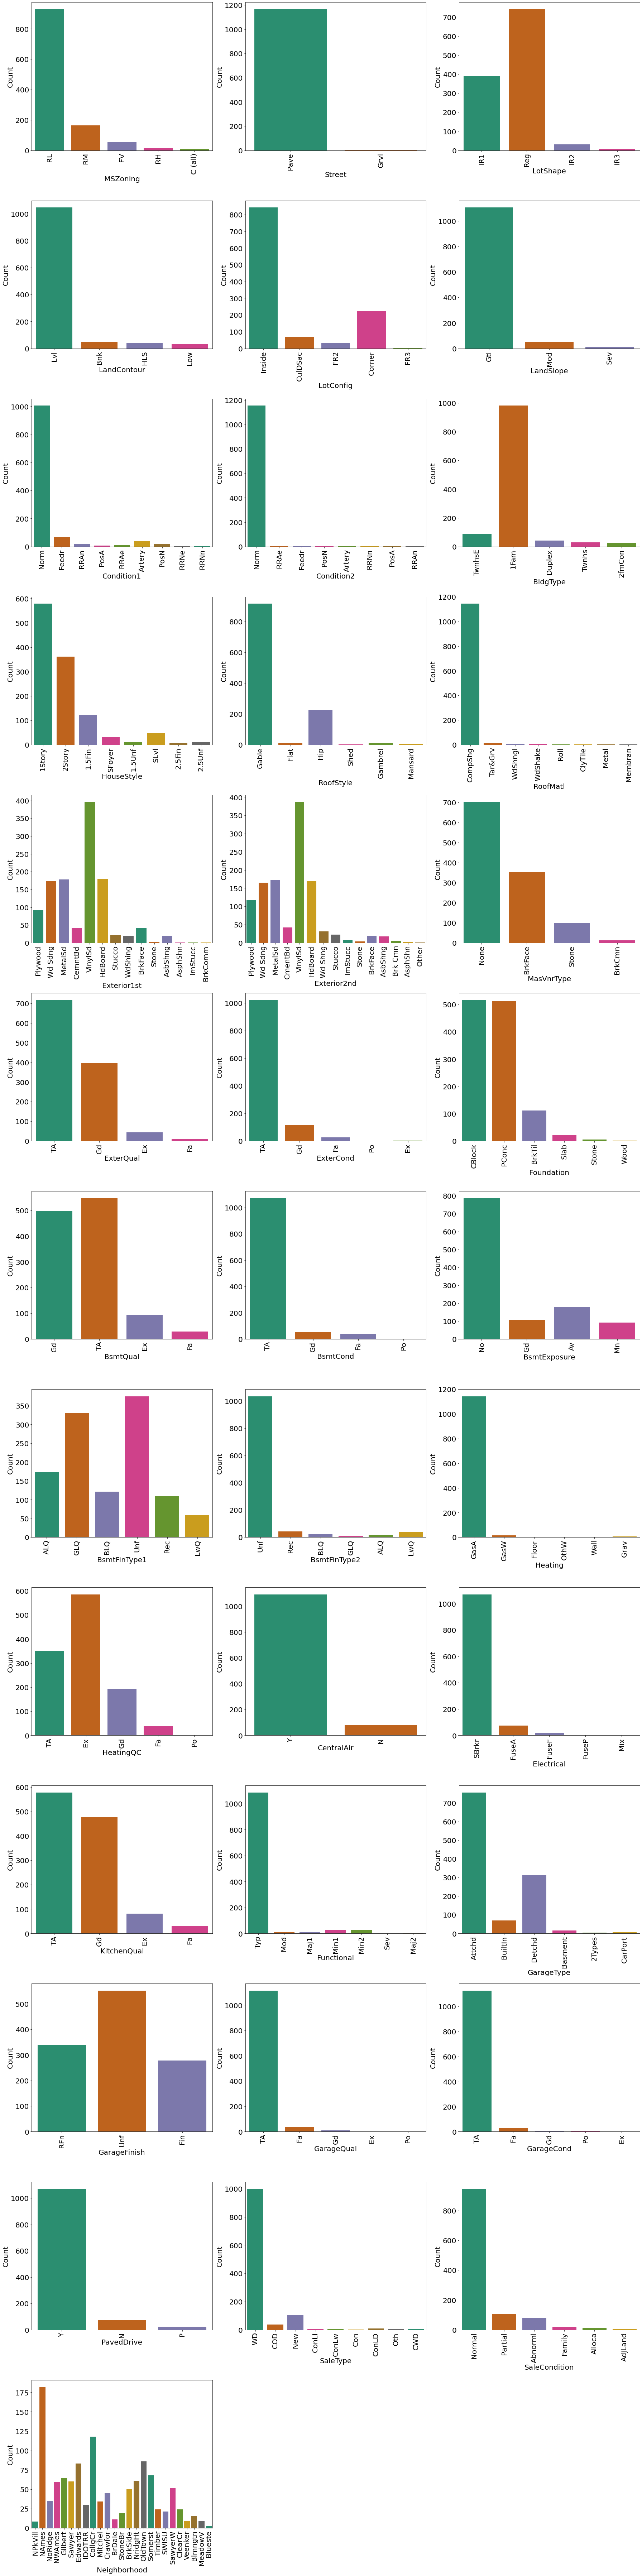

In [31]:
#Bar plot for all categorical columns

plt.figure(figsize = (25,100))
plotnumber = 1
for column in train[cat_columns]:
    if plotnumber <= 40:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(train[column],palette="Dark2")
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(rotation=0,fontsize = 20)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Count',fontsize = 20)
    plotnumber+=1
plt.tight_layout()

### Observations:


- MSZoning - Residential low-density zoning is discovered to have the highest count for the sale's feature general zoning classification (MSZoning).
- Street - The maximum number for the feature Type of road access to property may be seen under Paved Streets (Street).
- LotShape - There is a maximum count for the trait "generic shape" of properties with regular shapes (LotShape).
- land contour - The greatest count for a property's trait flatness is seen in a nearly level or level property (land contour).
- LotConfig - The feature lot configuration has a maximum count for the inner lot specified property (LotConfig).
- LandSlope - A property with a gentle slope will have the most features relative to its "slope" (land slope). 
- Condition1 - Norm has the highest count, it is followed by Feedr.
- Condition2 - Even here Norm has the highest count, however others are very less as compare to Norm.
- BldgType - Most of the buildings are 1 Farm type, were as others are too less as compared with 1 Farm type.
- HouseStyle - Most of the houses are 1 Story, they are followed by 2 Story and 1.5 respectively.
- RoofStyle - Most of them have chosed Gable RoofStyle, it is followed by Hip.
- RoofMatl - Compshg have highest count, while other are vess less as compared to it.
- Exterior1st - Vinylsd have highest count, it is followed by metalsd and hdfborad.
- Exterior2nd - Maximum counts for the feature Exterior covering for Vinyl Siding exterior-2 covering on house.
- MasVnrType - The maximum count for masonry veneer type (MasVnrType) is zero.
- ExterQual - For Typical/Average (TA), the outside material's quality has the highest weight, while features evaluates this factor has the lowest weight.
- ExterCond - The external material's or average (TA) state has the highest feature count. the material on the outside is evaluated for its current state.
- Foundation - For foundations made of cinder blocks and poured concrete, the count is at its highest (Foundation).
- BsmtQual - Number of features is significant for good and mediocre quality basement heights. considers the basement's height.
- BsmtCond - The count is high for the trait for Typical/Average(TA) general condition of the basement. evaluates the basement's overall condition.
- BsmtExposure - The feature count for No Exposure garden level walls is maximum. refers to garden level or walkout walls (BsmtExposure).
- BsmtFinType1 - The count is highest for the feature Rating of Basement Finished Area for unfinished Rating of Basement Finished Area-1.
- BsmtFinType2 - count for feature Rating of basement completed area (if many types) is at its highest for unfinished Rating of basement finished area-2.
- Heating - Excellent Heating condition and quality For the quality and condition of the feature Heating, the count is high.
- HeatingQC - Yes, the central air conditioning function has the most number of uses.
- CentralAir - The count is high for the feature Electrical system for Standard Circuit Breakers & Romex Electrical system.
- Electrical - The count is highest for the feature Kitchen quality for Typical/Average (TA) and excellent Kitchen quality.
- KitchenQual - The majority of the points for "Usual Functionality" relate to "Home Functionality" (assume typical unless exceptions are.
- Functional - The count is high for the feature Fireplace quality for good fireplace quality.
- GarageType - For the feature Garage placement, the count is high if the garage is attached to the dwelling.
- GarageFinish - The count is at its highest for the garage's showpiece interior finish, which is unfinished.
- GarageQual - The count is high for Typical/Average (TA) Garage quality, while the feature Garage quality is low.
- GarageCond - The count is high for the Typical/Average (TA) garage condition, but low for the highlight garage condition.
- PavedDrive - The count is at its highest for the feature Paved driveway.
- SaleType - The count is maximal for Warranty Deed - Conventional type of sales, and for the feature kind of sale.
- SaleCondition - The count is large for normal sales conditions, and for the feature condition of sale.

### Ploting Numerical columns

In [32]:
# All Numerical columns
inti = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

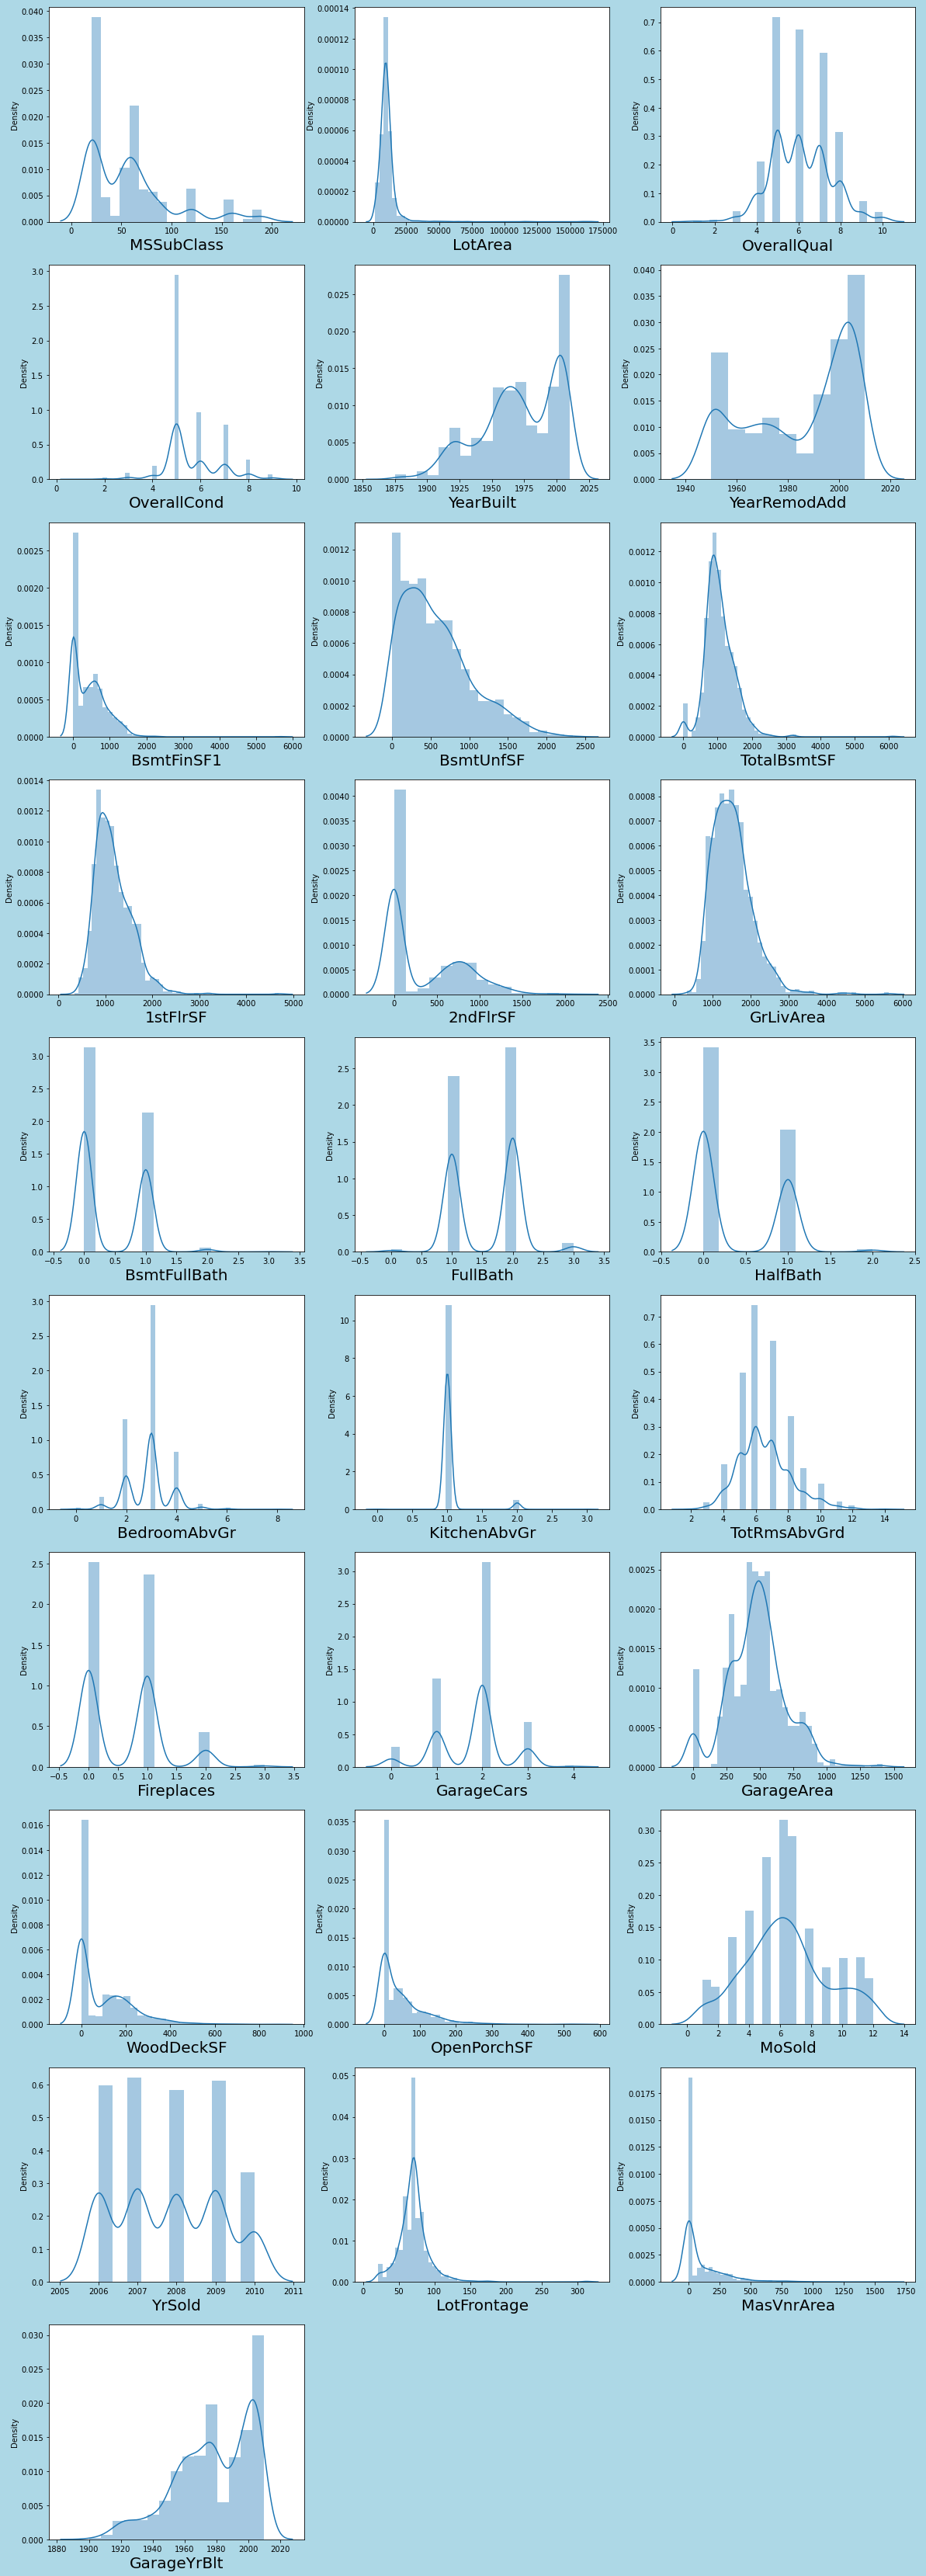

In [33]:
# Checking distribution of data for numerical columns
plt.figure(figsize = (20,60), facecolor = 'lightblue')
plotnumber = 1

for column in inti:
    if plotnumber <= 28:
        ax = plt.subplot(10,3, plotnumber)
        sns.distplot (train[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

### Observations: 
1. I can tell from the distribution plot above that only a small proportion of the columns are approximately normally distributed.
2. Since the mean is greater than the median in these columns, the majority of the columns are skewed and skewed to the right. Before developing our machine learning models, we must get rid of this skewness.

## Data Visualization - Multivariate/Bivariate Graphical

**The sales price will be compared to all other columns in our dataset.**

### Comparing Sales price with Numerical Columns

In [34]:
intia = ['LotArea','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
        'OpenPorchSF', 'LotFrontage', 'MasVnrArea','YearBuilt','YearRemodAdd','GarageYrBlt']

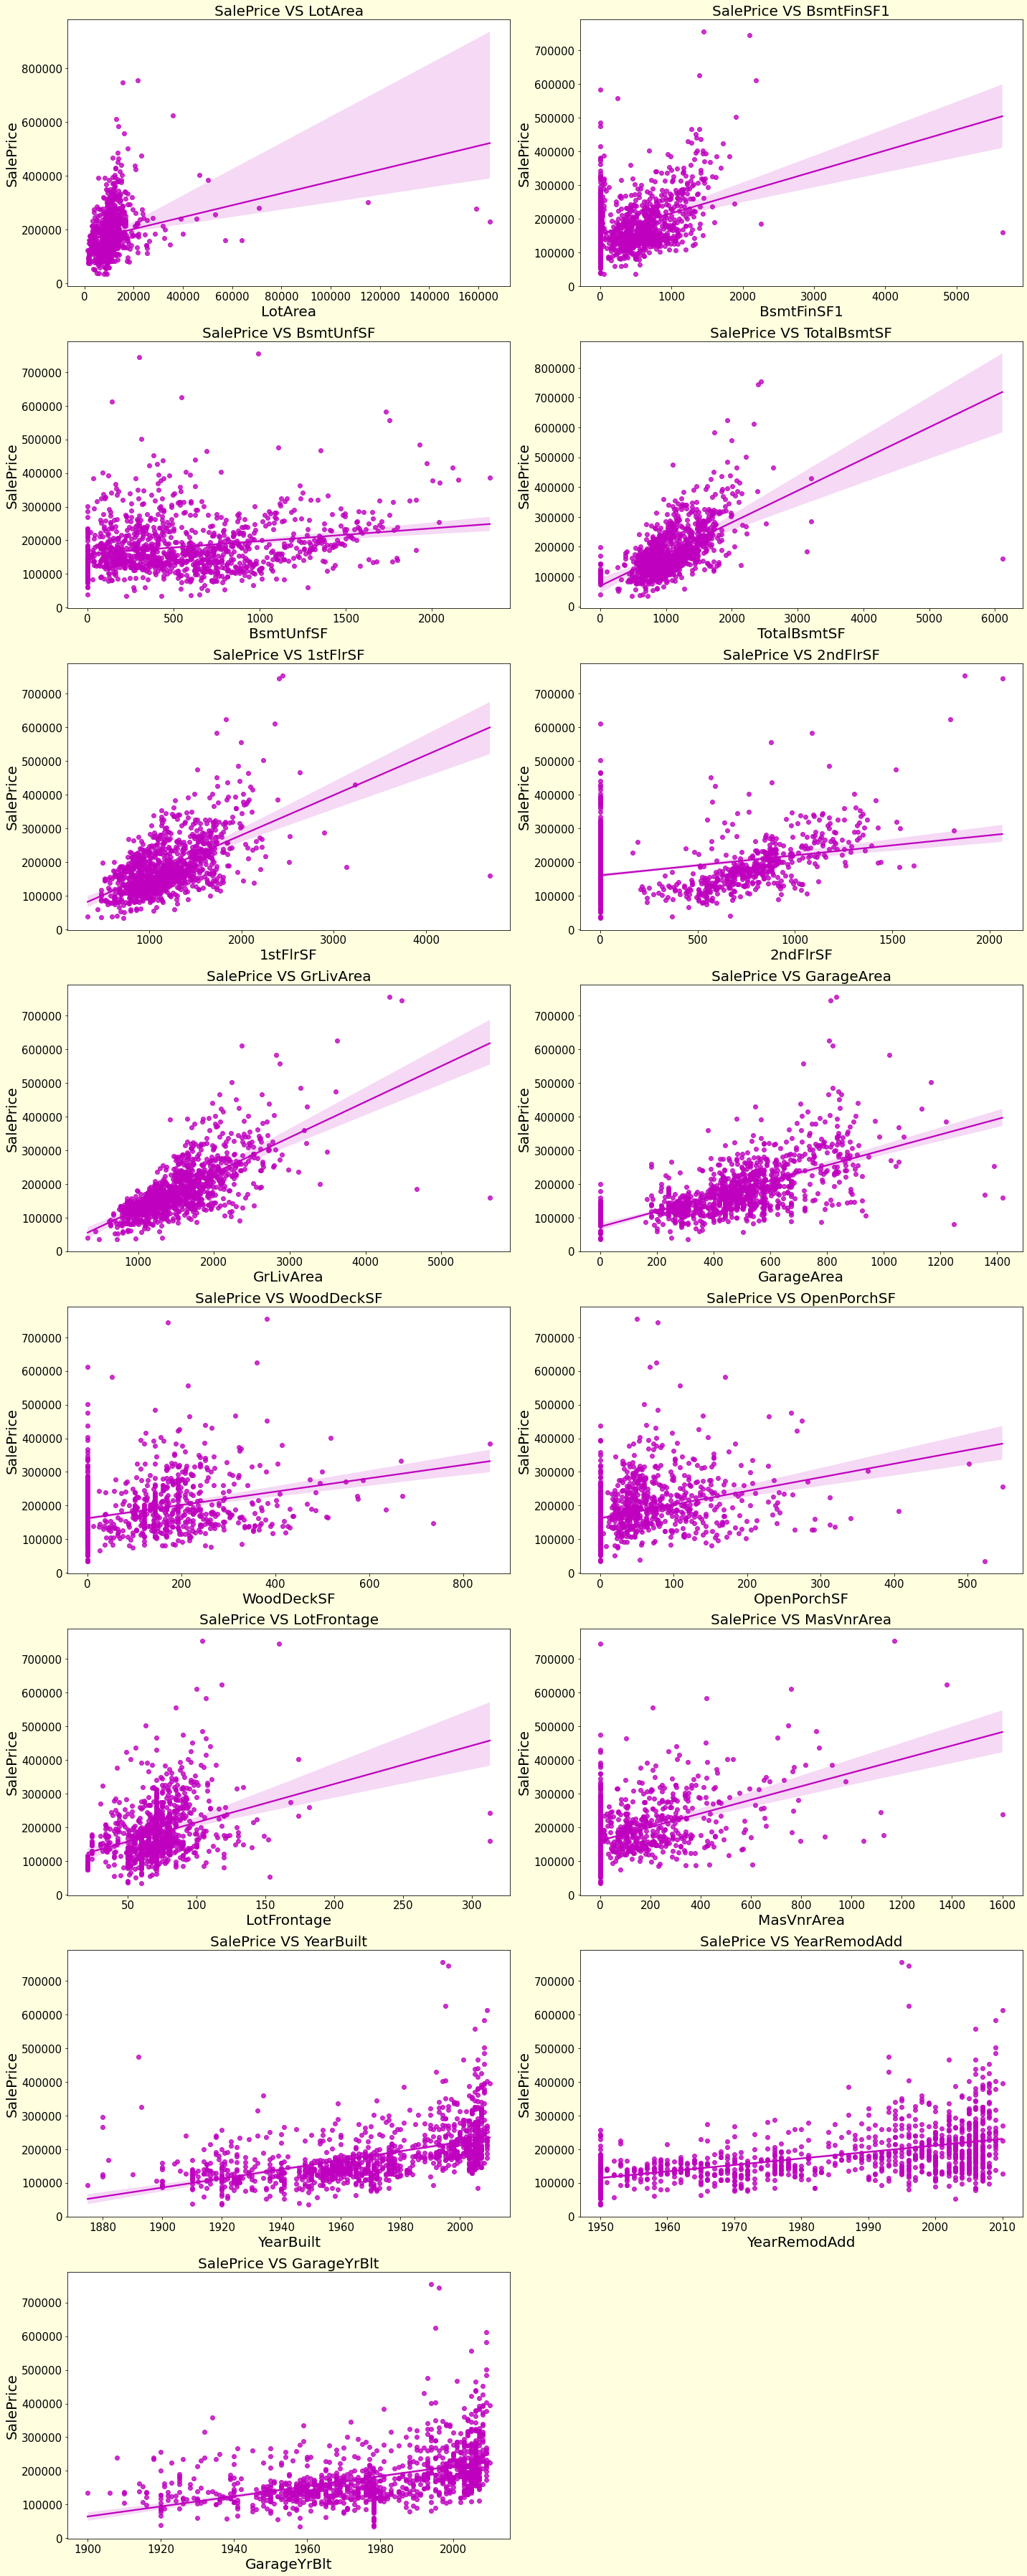

In [35]:
#regplot for numerical(continous) columns
plt.figure(figsize=(20,50), facecolor = 'lightyellow')
for i in range(len(intia)):
    plt.subplot(8,2,i+1)
    sns.regplot(x=train[intia[i]] , y=train['SalePrice'],color="m")
    plt.title(f"SalePrice VS {intia[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(intia[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

### Observation - 

- As the number of linear feet of street frontage on a property increases, sales are declining and the sale price is fluctuating between 0 and 3 lakhs.
- Sales are declining and the sale price is between 0 and 4 lakhs as lot size (lot area) increases.
- Sales are declining and the sale price is between 0 and 4 lakhs as the Masonry Veneer Area (MasVnrArea) grows.
- Sales are declining as Type 1 completed square feet (BsmtFinSF1) rise, and the sale price ranges from 0 to 4 lakhs.
- As unfinished basement square feet (BsmtUnfSF) increase, sales decline and the sale price ranges from 0 to 4 lakhs. There are also some anomalies.
- Sales are declining as total basement square feet (TotalBsmtSF) increases, and the sale price ranges from 0 to 4 lakhs.
- Sales are declining as First Floor square feet (FirstFlrSF) increases, and the sale price ranges from 0 to 4 lakhs.
- As second floor square feet (second floor SF) increases, sales rise by 500–1000 and the sale price ranges from 0–4 lakhs.
- As above-ground living space (GrLivArea) increases, sales decline and the sale price ranges from 0 to 4 lakhs.
- Sales are increasing and the sale price ranges from 0 to 4 lakhs as garage area (measured in square feet) increases.
- As the square footage of wood decks (WoodDeckSF) increases, sales decline and the sale price ranges from 0 to 4 lakhs.
- As open porch square footage (OpenPorchSF) increases, sales decline and the sale price ranges from 0 to 4 lakhs.
- Sales are declining as Year Since Built increases, and the sale price is high for recently constructed buildings, ranging from 0 to 4 lakhs.
- Sales are declining and the sale price is between 1-4 lakhs as of the Year SinceRemodAdded (same as construction date if no remodelling or additions) date, which is increasing.
- Sales are declining and the sale price is between 0 and 4 lakhs as garage age (the year it was built) increases.

### Comparing sales price with other numerica columns

In [36]:
intib = ['MSSubClass', 'OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr'
,'TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']

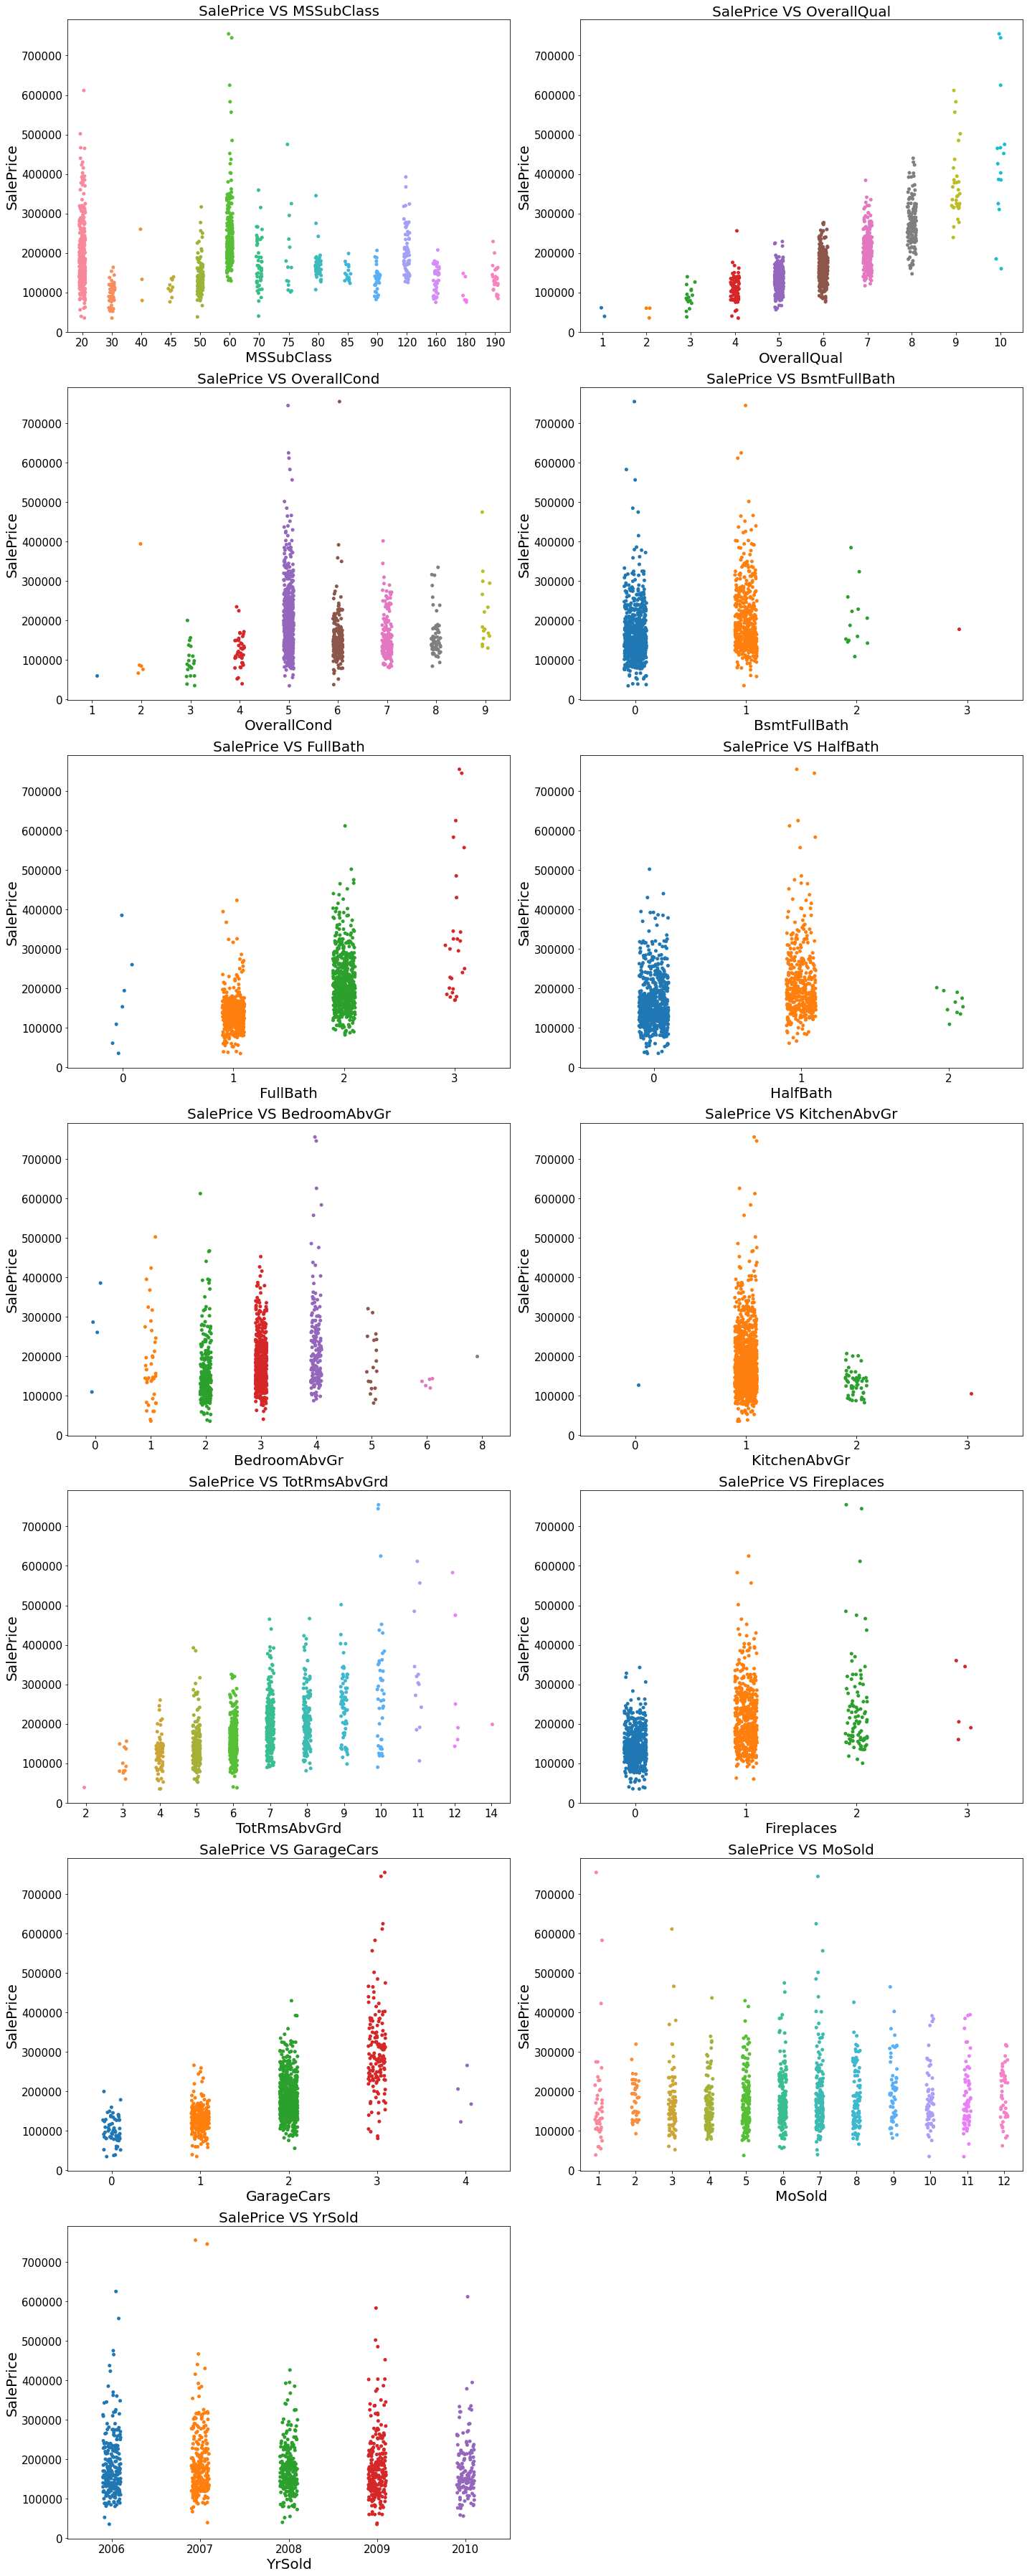

In [37]:
#stripplot for numerical columns
plt.figure(figsize=(20,50))
for i in range(len(intib)):
    plt.subplot(7,2,i+1)
    sns.stripplot(x=train[intib[i]] , y=train['SalePrice'])
    plt.title(f"SalePrice VS {intib[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(intib[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

### Observations

- The sales are strong and the sale price is high for dwellings that are 1-STORY 1946 & NEWER ALL STYLES (20) and 2-STORY 1946 & NEWER (60) in the MSSuubClass.
- As rates rise, sales and the sale price both rise linearly along with the overall quality of the home's construction (OverallQual).
- The sales are strong and the sale price is similarly high for homes in 5(Average) overall condition.
- Both sales and selling prices are high for basement full bathrooms with a count of 0 and 1, or BsmtFullBath.
- The sale price and sales volume for 0 Basement half bathrooms (BsmtHalfBath) are both high.
- Both sales and selling prices are high for full bathrooms above grade (1 and 2).
- Sales as well as SalePrice are high for homes with 0 and 1 Half bathrooms above grade (HalfBath).
- The sales in addition to SalePrice are high for 2, 3, and 4 bedroom above grade (not Included in basement bedrooms) (BedroomAbvGr).
- For one Kitchen Above Grade, both sales and sale prices are high.
- Both the sales volume and the sale price are high for properties with 4 to 9 total rooms over grade (excluding bathrooms).
- Sales in addition to SalePrice are high for 0 and one fireplaces (Fireplaces).
- Sales are high for garages with a car capacity of 1 and 2, and the sale price is high for garages with a car capacity of 3.
- For Month Sold (MoSold), the sales are good with SalePrice from April to August.
- The salePrice & sales are same for all Years Sold.

### Comparing sales price with categorical columns

In [38]:
# Column for Categorical columns
cat_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig','LandSlope', 'Condition1', 'Condition2', 'BldgType',
'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'Neighborhood']

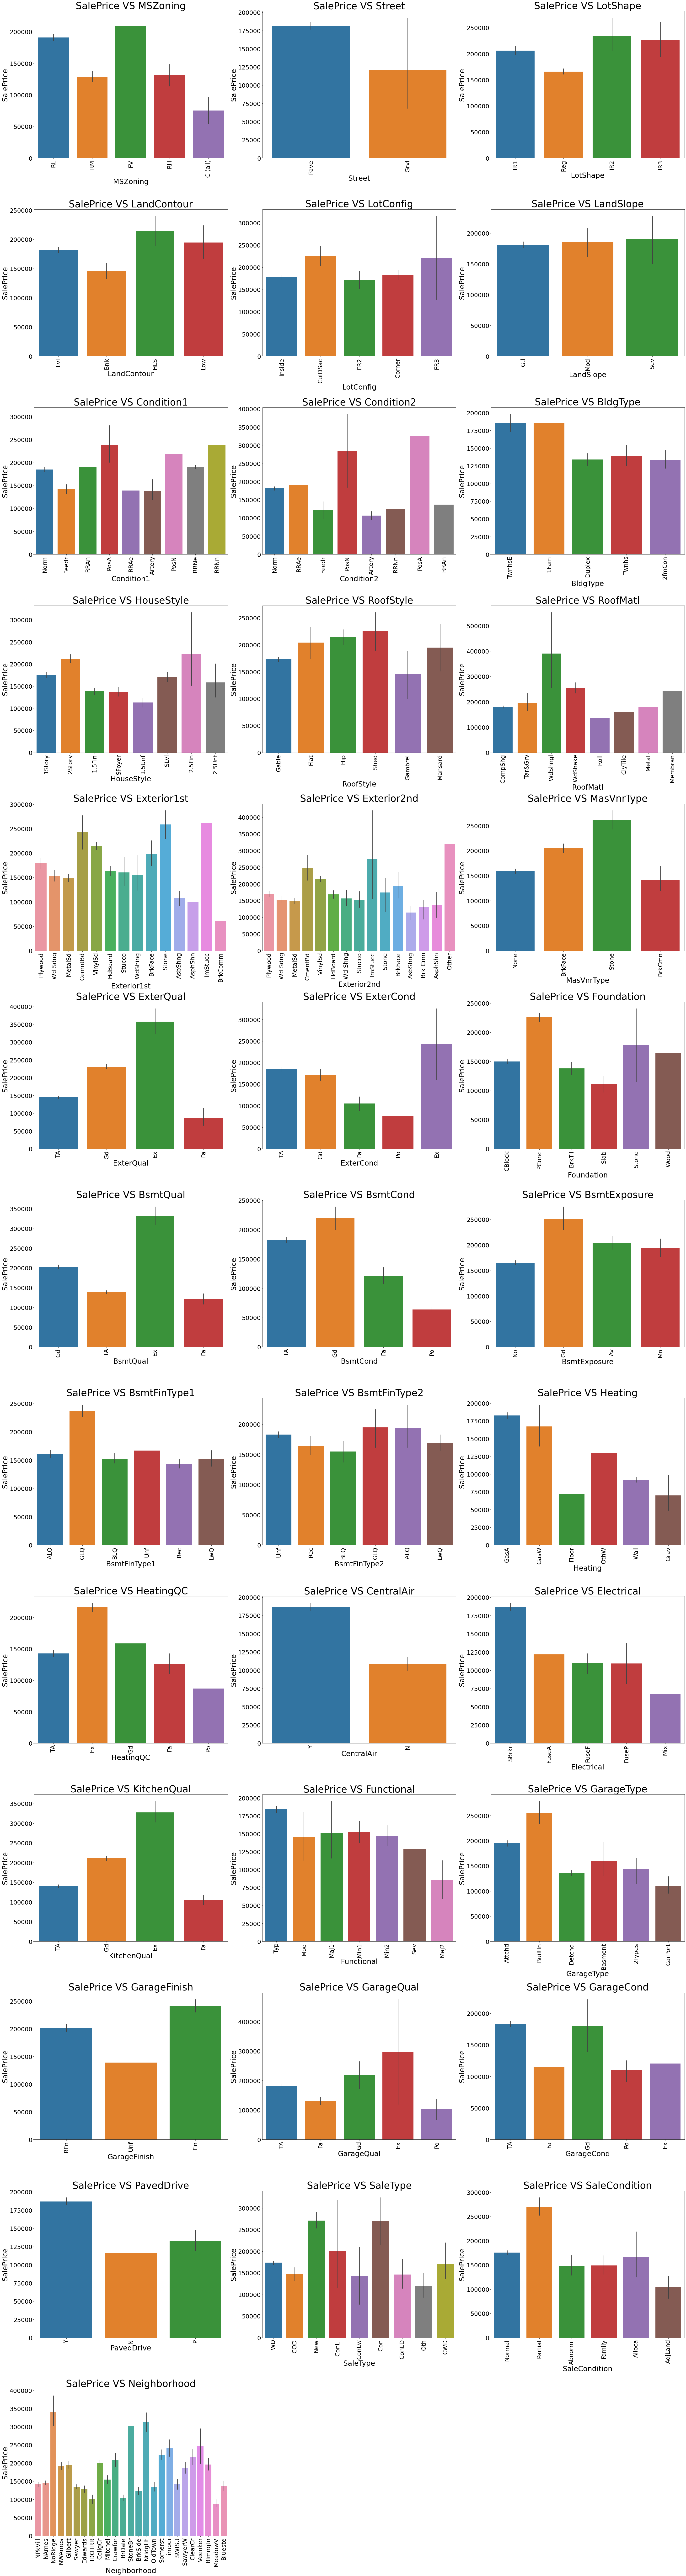

In [39]:
#Bar plot for all categorical columns
plt.figure(figsize=(40,150))
for i in range(len(cat_columns)):
    plt.subplot(13,3,i+1)
    sns.barplot(y=train['SalePrice'],x=train[cat_columns[i]])
    plt.title(f"SalePrice VS {cat_columns[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(cat_columns[i],fontsize = 30)
    plt.ylabel('SalePrice',fontsize = 30)
    plt.tight_layout()

### Observation
- The sale price is high for the zoning classifications of Floating Village Residential (FV) and Residential Low Density (RL) properties.

- The sale price is high for property access through a paved road (Street).

- The SalePrice is high for properties that have a lot shape that is somewhat irregular (IR1), moderately irregular (IR2), or irregular (IR3).

- The sale price is high for properties with a hillside that has a significant side-to-side slope (HLS) and flat terrain (LandContour).

- The sale price is high for lots that are in cul-de-sacs (CulDSac).

- All sorts of property's slope, including gentle slope (Gtl), moderate slope (Mod), and severe slope (Sev), have high sale prices.
- The SalePrice is High for Northridge (NoRidge) areas inside the boundaries of the city of Ames.

- The maximum SalePrice is for properties located within 200 feet of the North-South Railroad (RRNn), next to positive off-site features (PosA), and close to positive off-site features (PosN) such as parks, greenbelts, etc.

- For Near positive off-site feature, such as a park or greenbelt, and for adjacent positive off-site feature (PosA) (PosN) If more than one condition is present, proximity to Condition 2 has a maximum sale price.

- The sale price is high for single-family detached homes (1Fam) and townhouse end units (TwnhsE) as building types.
- For two-story and two-and-a-half-story homes, the sale price is high since the second level is finished (2.5Fin).

- The SalePrice is high for roof styles with shed-style roofs.

- The SalePrice is high for Wood Shingles (WdShngl) Roof Material (RoofMat1).

- The sale price is high for exterior home coverings made of cement board (CemntBd), imitation stucco (ImStucc), and stone (Exterior1st).

- The maximum SalePrice is for Cement Board (CemntBd), Imitation Stucco (ImStucc), and other Exterior covering of the home (if more than one material).

- The SalePrice is high for the Stone Masonry veneer type (MasvnrType).

- The sale price is high for external material that is of Excellent (Ex) grade.
- The sale price is high for materials that are currently in Excellent (Ex) condition on the exterior (ExterCond).

- The sale price is high for foundations made of poured concrete (PConc).

- The sale price is expensive for the basement's Excellent (100+ inches) (Ex) height (BsmtQual).

- The sale price is expensive for the basement's good (Gd) overall condition (BsmtCond).

- The highest sale price is for walkout or garden level walls with Good Exposure (Gd) (BsmtExposure).

- The maximum SalePrice is for Good Living Quarters (GLQ) of basement completed area (BsmtFinType1).

- The maximum SalePrice is for the finished basement area of Good Living Quarters (GLQ) and Average Living Quarters (ALQ) (if there are numerous types).

- Gas forced warm air furnaces (GasA) and gas hot water or steam heaters (GasW) have high sale prices for the kind of heating (Heating).
- Excellent (Ex) heating quality and condition (HeatingQC) command a premium sale price.

- The sale price is expensive for buildings with central air conditioning.

- The SalePrice is Maximum for Romex (Sbrkr) and Standard Circuit Breakers of Electrical Systems.

- Kitchen quality that is Excellent (Ex) is of a high SalePrice.

- For Normal Capability(Typ) kind of Home functionality, the SalePrice is high (assume typical unless reductions are justified).

- The highest sale price is for an Excellent-Exceptional Masonry Fireplace (Ex) of Fireplace quality (FireplaceQual).

- The maximum SalePrice applies to Built-In (Garage section of house - often has space above garage) Garage locations.
- The SalePrice is expensive for a garage that has been completely completed on the inside (GarageFinish).

- The sale price is high for Excellent (Ex) Garage quality (GarageQual).

- The sale price is high for typical/average (TA) and good (Gd) garage conditions (GarageCond).

- The sale price is high since the driveway is paved.

- The home that was recently built and sold (New) and the contract that required a 15% down payment under normal conditions (Con) had the highest sale price.

- The SalePrice is maximal if the home was incomplete when it was last evaluated (related to new homes) (Partial) SalesCondition.

#### After finishing our work on visual analytics, we will now start our other procedure to create machine learning models.

# Outliers (Checking and Removing outliers)

- Lets being with checking outliers for both our data sets.

## 1. Train Dataset 
## A. Checking outliers

In [40]:
num_col = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']

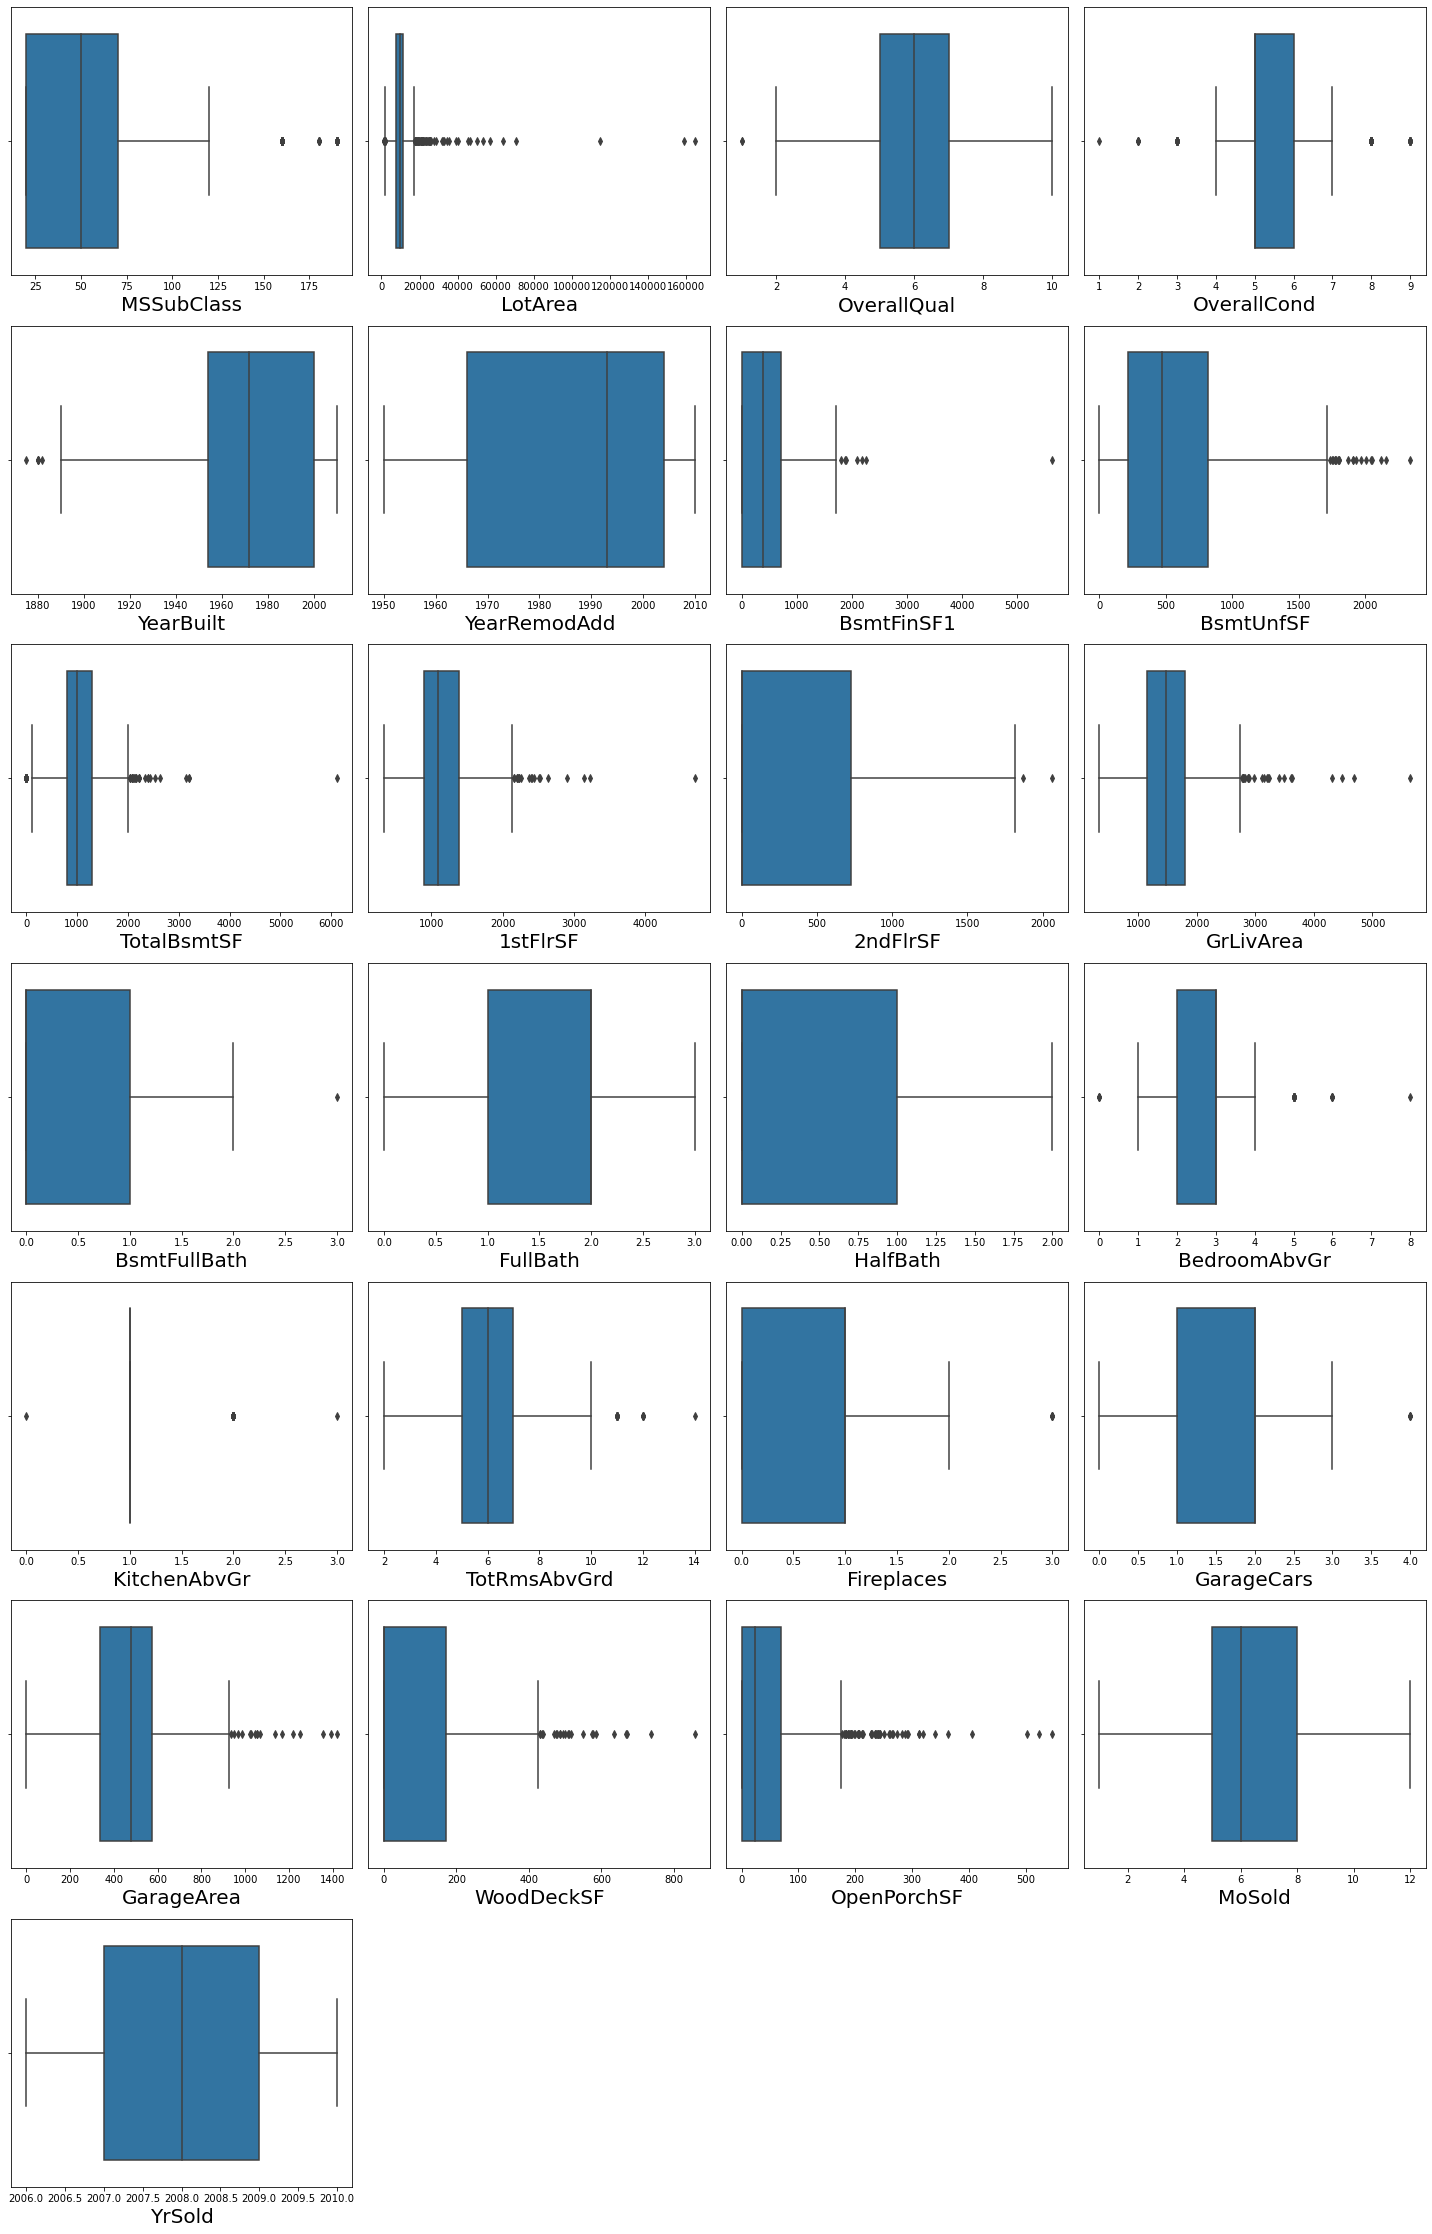

In [41]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(20,35))
plotnumber=1
for column in num_col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## B. Removing outliers - Zscore method:

In [42]:
# Below columns have outliers
train_outliers = train[['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [43]:
# Importing zscore
from scipy.stats import zscore
z = np.abs(zscore(train_outliers))
new_train = train [(z<3).all(axis=1)]

In [44]:
### After removing outliers rows and columns of train data is
new_train.shape

(1100, 66)

## 2. Test Dataset 
## A. Checking outliers

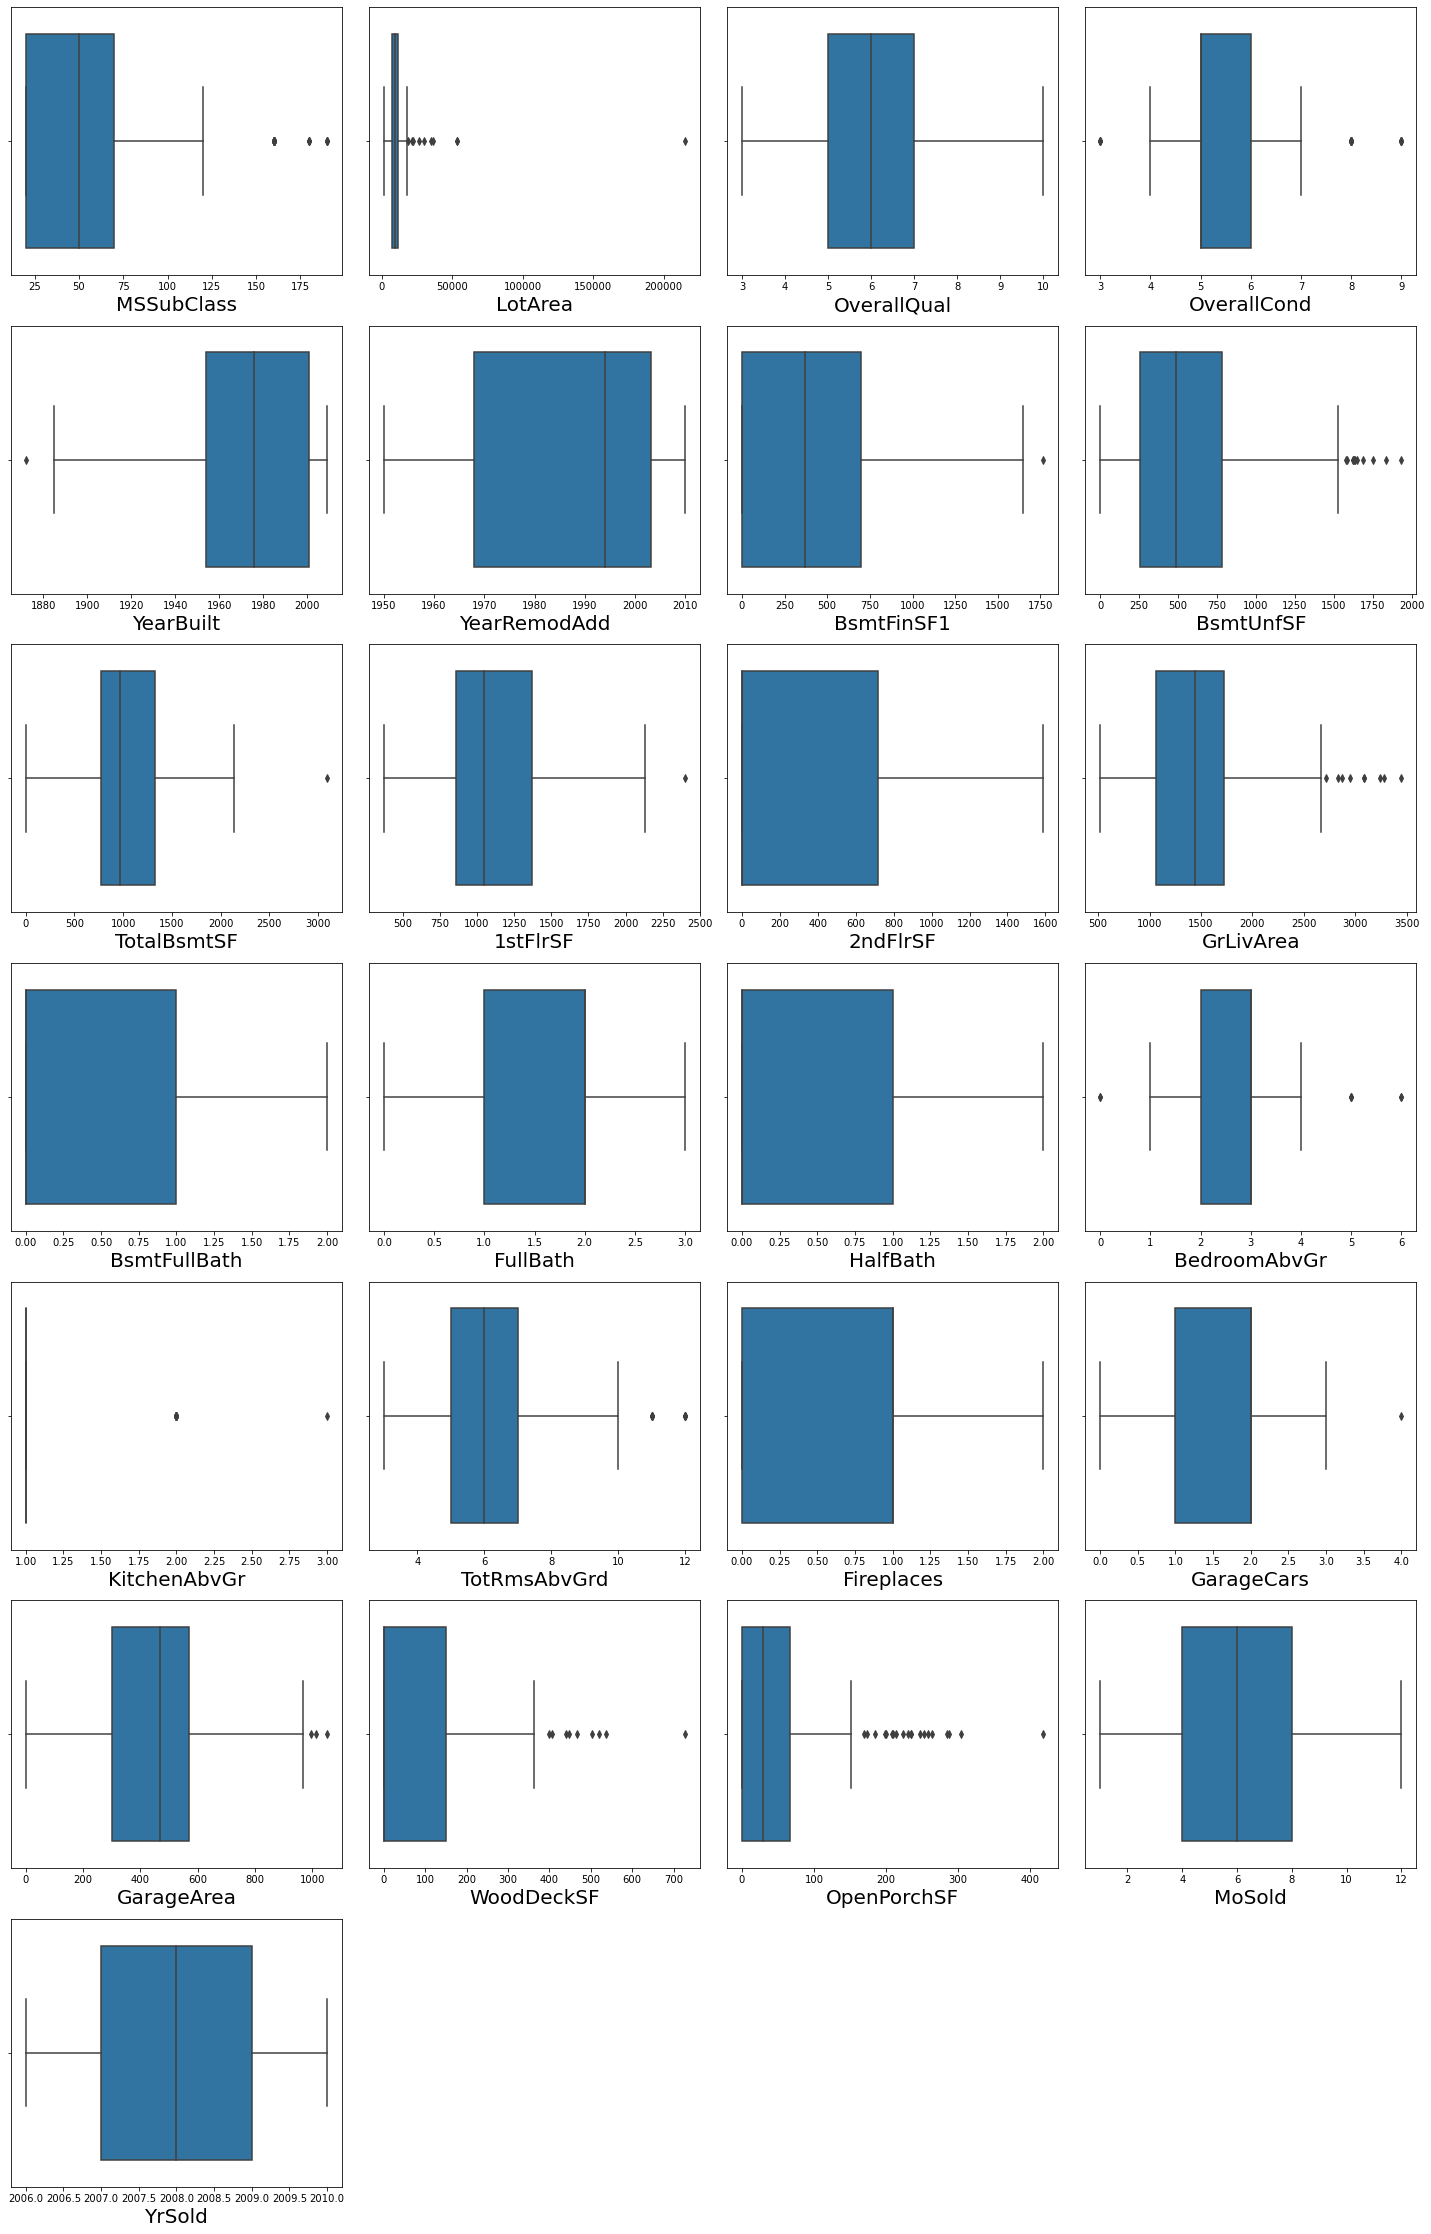

In [45]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(20,35))
plotnumber=1
for column in num_col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(test[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## B. Removing outliers - Zscore method:

In [46]:
# Below columns have outliers
test_outliers = train[['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [47]:
# Importing zscore
from scipy.stats import zscore
z = np.abs(zscore(test_outliers))
new_test = test [(z<3).all(axis=1)]

In [48]:
### After removing outliers rows and columns of train data is
new_test.shape

(276, 65)

# Checking and Removing Skewness

# 1. Train Data

### Checking Skewness

In [49]:
# Checking skewness of train data
new_train.skew()

MSSubClass      1.387008
LotFrontage     1.981300
LotArea         1.183419
OverallQual     0.034661
OverallCond     0.539178
YearBuilt      -0.554154
YearRemodAdd   -0.470397
MasVnrArea      2.790990
BsmtFinSF1      0.664185
BsmtUnfSF       0.806609
TotalBsmtSF     0.069625
1stFlrSF        0.635331
2ndFlrSF        0.734137
GrLivArea       0.544433
BsmtFullBath    0.631574
FullBath        0.009652
HalfBath        0.699288
BedroomAbvGr    0.080755
KitchenAbvGr    4.311060
TotRmsAbvGrd    0.525531
Fireplaces      0.675618
GarageYrBlt    -0.634915
GarageCars     -0.368224
GarageArea     -0.073114
WoodDeckSF      1.014196
OpenPorchSF     1.471143
MoSold          0.228355
YrSold          0.114595
SalePrice       1.306430
dtype: float64

### Removing Skewness

In [50]:
# Skewness is present in below columns - 
train_skewness = ['MSSubClass','LotFrontage','LotArea' ,  
'MasVnrArea' ,'BsmtFinSF1' ,'BsmtUnfSF' ,'1stFlrSF' ,'2ndFlrSF' ,'BsmtFullBath'    
,'HalfBath'   ,'KitchenAbvGr'    ,'Fireplaces'   ,'GarageYrBlt'    ,'WoodDeckSF'    ,'OpenPorchSF'     ,'SalePrice']

In [51]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [52]:
# Removing skewness
new_train [train_skewness] = scaler.fit_transform(new_train[train_skewness].values)

In [53]:
# Checking if skewness is removeds
new_train[train_skewness].skew()

MSSubClass      0.061183
LotFrontage     0.197001
LotArea         0.118398
MasVnrArea      0.430239
BsmtFinSF1     -0.411475
BsmtUnfSF      -0.308788
1stFlrSF       -0.002729
2ndFlrSF        0.296508
BsmtFullBath    0.400100
HalfBath        0.530322
KitchenAbvGr   -2.274721
Fireplaces      0.116597
GarageYrBlt    -0.128913
WoodDeckSF      0.144231
OpenPorchSF     0.027261
SalePrice       0.004915
dtype: float64

# 2. Test Data

### Checking skewness

In [54]:
# Checking skewness of test data
new_test.skew()

MSSubClass      1.340988
LotFrontage     0.270466
LotArea         1.801129
OverallQual     0.427098
OverallCond     1.193713
YearBuilt      -0.774330
YearRemodAdd   -0.548530
MasVnrArea      1.945324
BsmtFinSF1      0.771602
BsmtUnfSF       0.943007
TotalBsmtSF     0.673205
1stFlrSF        0.712442
2ndFlrSF        0.716631
GrLivArea       0.944266
BsmtFullBath    0.458250
FullBath       -0.072648
HalfBath        0.737497
BedroomAbvGr    0.061605
KitchenAbvGr    5.184463
TotRmsAbvGrd    0.763631
Fireplaces      0.491187
GarageYrBlt    -0.695753
GarageCars     -0.252123
GarageArea      0.139893
WoodDeckSF      1.733175
OpenPorchSF     2.151568
MoSold          0.191624
YrSold          0.025325
dtype: float64

### Removing Skewness

In [55]:
# Skewness is present in below columns - 
test_skewness = ['MSSubClass','LotArea','OverallCond','YearBuilt' ,'YearRemodAdd' ,'MasVnrArea' ,'BsmtFinSF1' ,'BsmtUnfSF' ,'TotalBsmtSF'    
,'1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','HalfBath' ,'KitchenAbvGr' ,'TotRmsAbvGrd', 'GarageYrBlt','WoodDeckSF',
             'OpenPorchSF']

In [56]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [57]:
new_test [test_skewness] = scaler.fit_transform(new_test[test_skewness].values)

In [58]:
new_test[test_skewness].skew()

MSSubClass      0.089403
LotArea         0.110378
OverallCond    -0.075820
YearBuilt      -0.177318
YearRemodAdd   -0.230449
MasVnrArea      0.327652
BsmtFinSF1     -0.436258
BsmtUnfSF      -0.184371
TotalBsmtSF     0.085352
1stFlrSF        0.005353
2ndFlrSF        0.270631
GrLivArea      -0.000989
BsmtFullBath    0.388432
HalfBath        0.594316
KitchenAbvGr    4.501718
TotRmsAbvGrd    0.000597
GarageYrBlt    -0.141617
WoodDeckSF      0.217969
OpenPorchSF    -0.081309
dtype: float64

**Note: The column "KitchenAbvGr" has too high skewness in both the train and test datasets; as a result, it has to be removed from both. This can have an impact on our algorithm.**

In [59]:
# Dropping KitchenAbvGr from both datasets
# Train
new_train.drop(['KitchenAbvGr'],axis=1,inplace=True)

In [60]:
# Test
new_test.drop(['KitchenAbvGr'],axis=1,inplace=True)

#### Removed KitchenAbvGr from both datasets

# Encoding Categorical columns

# Ordinal Encoding:

**Note - There are a few columns with ratings, so we'll use ordinal encoding to encode those. This will provide substantial power to larger numbers, so we'll assign numbers to ratings in accordance.**

# 1. Train Dataset

In [61]:
# Using Ordinal Encoding for columns with ratings
rating_columns = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
for i in rating_columns:
    new_train[i] = new_train[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [62]:
#Importing Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
OrdEnc = OrdinalEncoder()
for i in new_train.columns:
    if new_train[i].dtypes=='object':
        new_train[i]=OrdEnc.fit_transform(new_train[i].values.reshape(-1,1))

# 2. Test Dataset

In [63]:
# Using Ordinal Encoding for columns with ratings
rating_columns = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
for i in rating_columns:
    new_test[i] = new_test[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [64]:
#Ordinal encoding for test dataset
from sklearn.preprocessing import OrdinalEncoder
OrdEnc = OrdinalEncoder()
for i in new_test.columns:
    if new_test[i].dtypes=='object':
        new_test[i]=OrdEnc.fit_transform(new_test[i].values.reshape(-1,1))

# Correlation - Heat Map

# Train Data

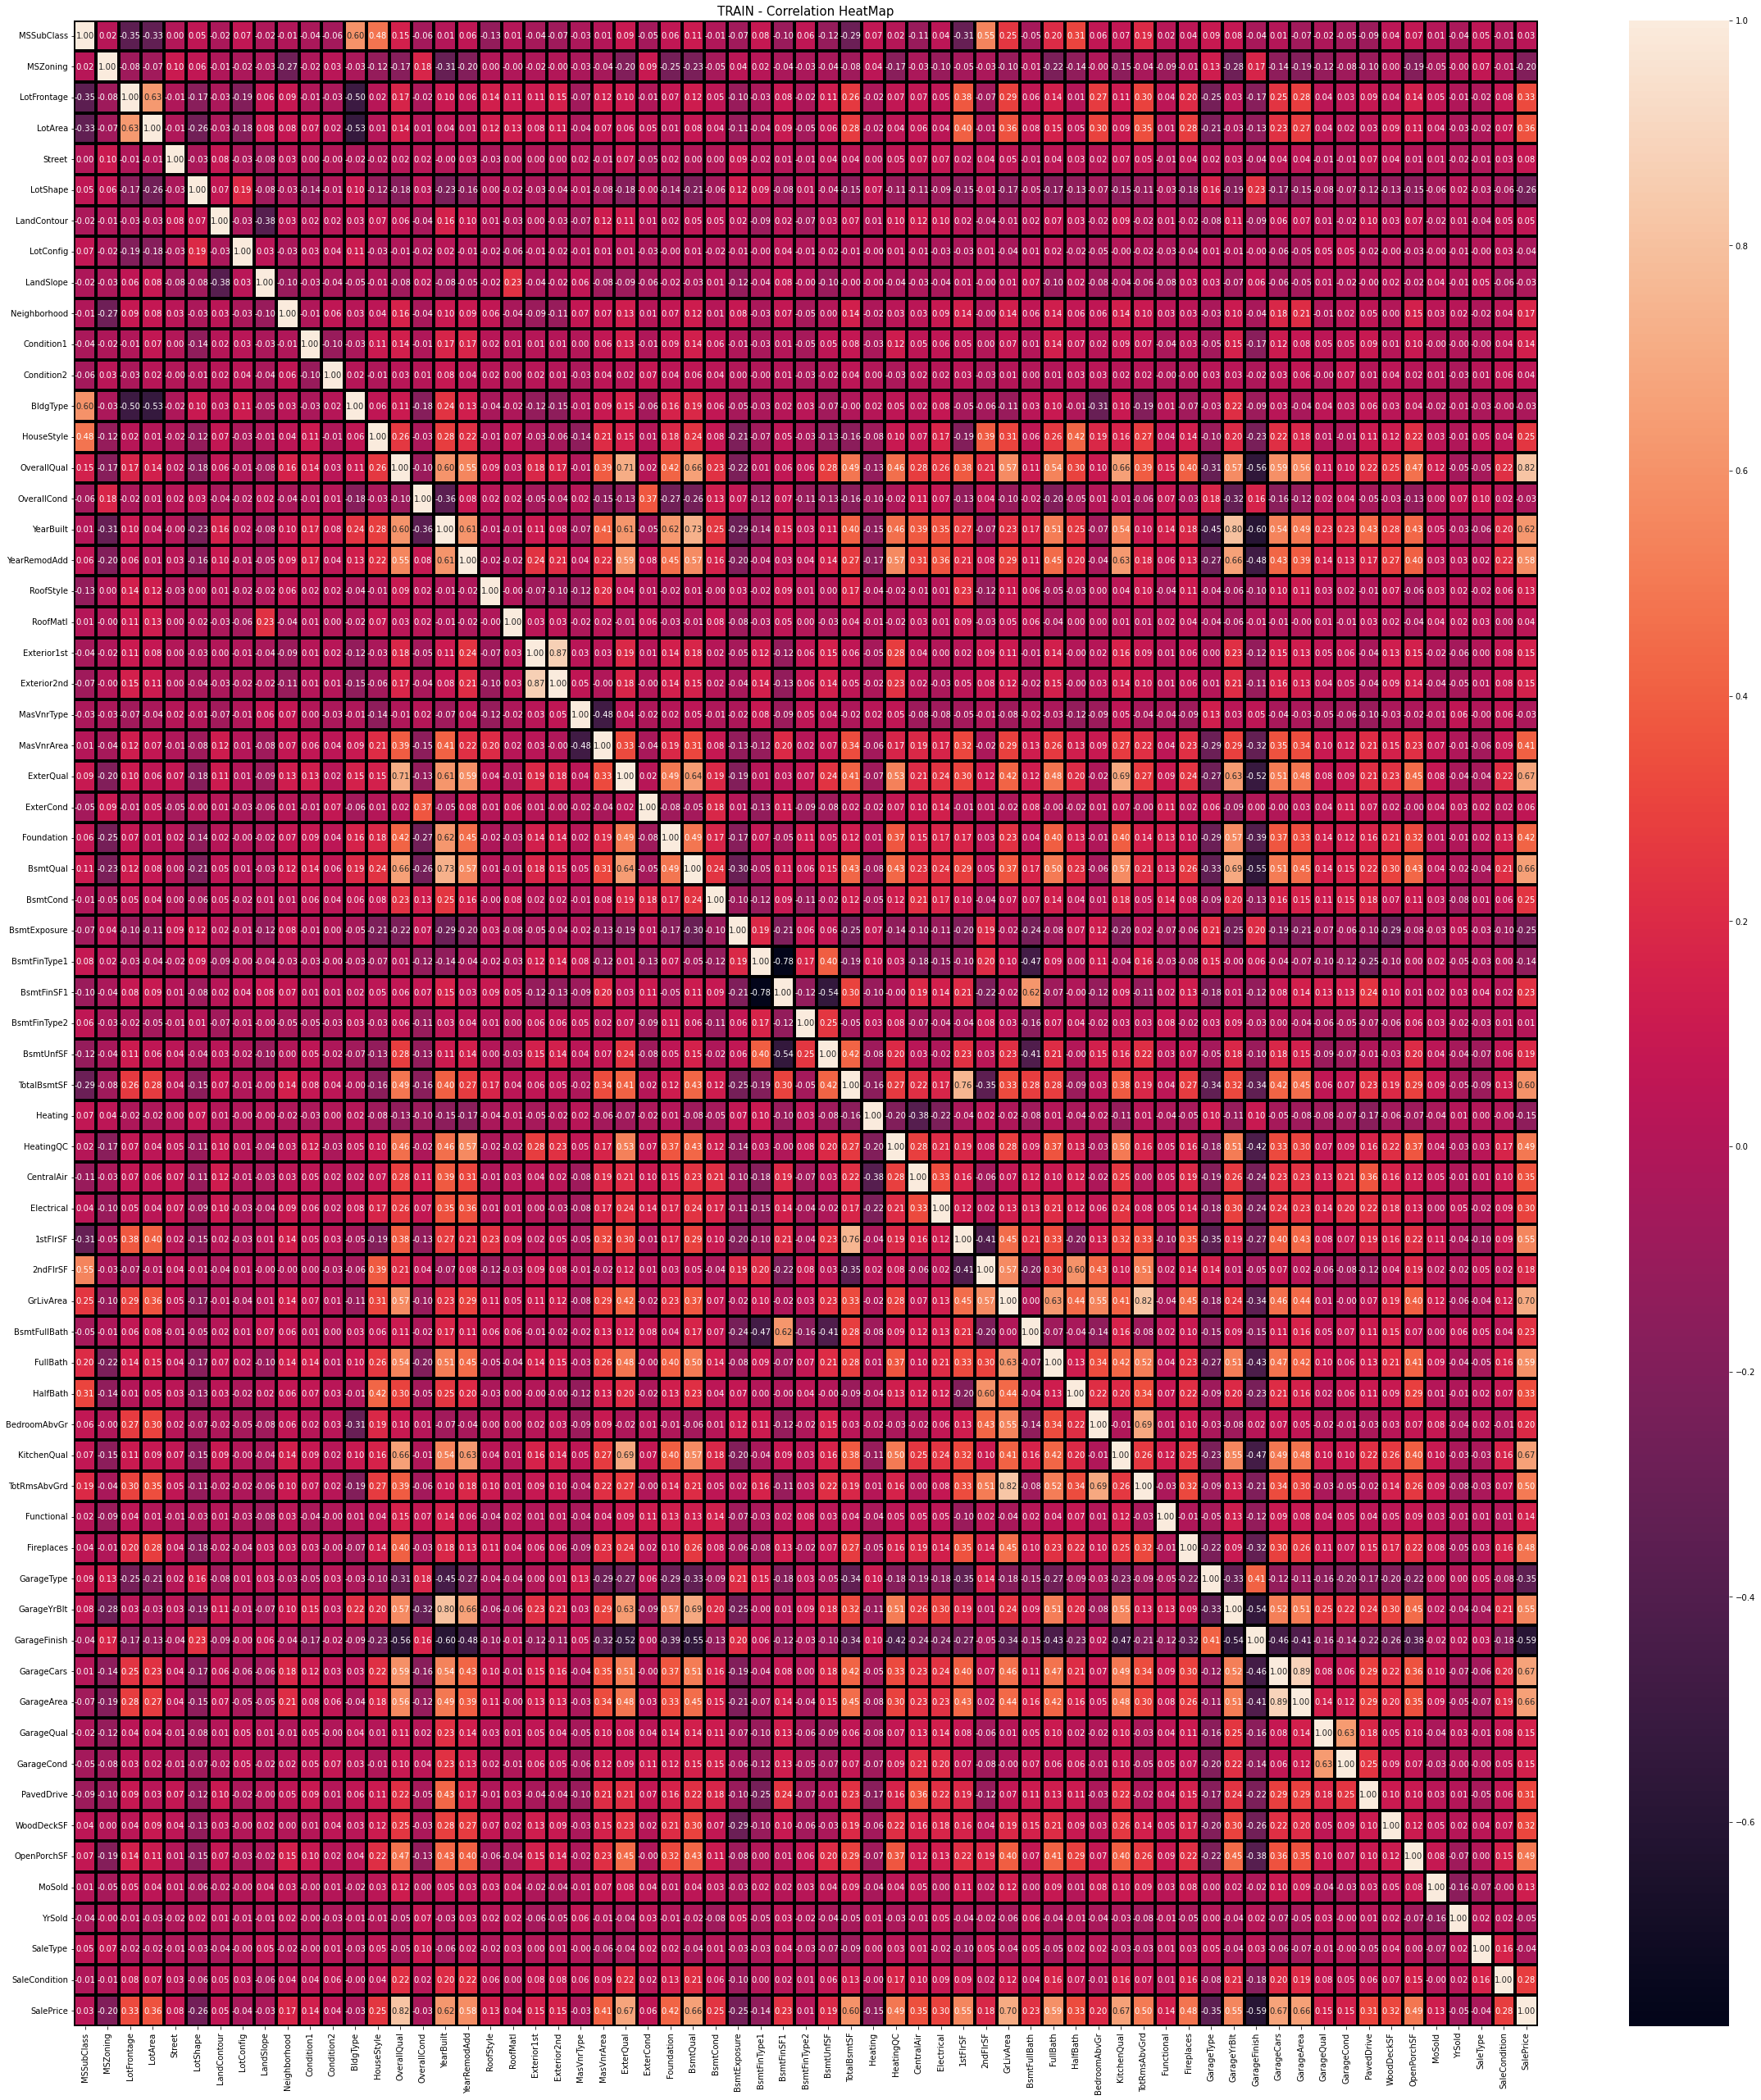

In [65]:
cor =  new_train.corr()
plt.figure(figsize=(40,45))
plt.title('TRAIN - Correlation HeatMap', fontsize = 15)
sns.heatmap(new_train.corr(), annot = True , linewidths = 4, linecolor='black',fmt='.2f')
plt.show()

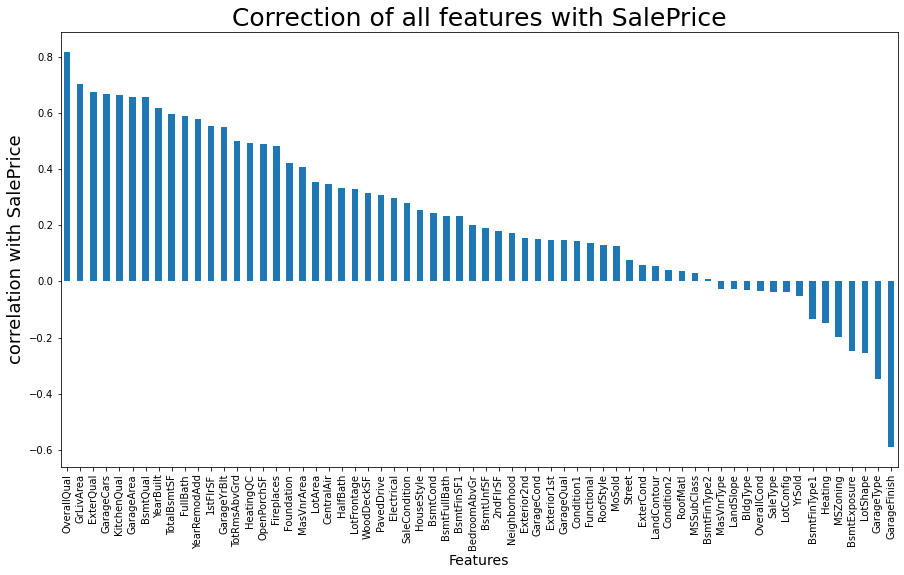

In [66]:
# Checking correlation of all features with SalePrice
plt.figure(figsize = (15,8))
new_train.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot.bar()
plt.xlabel("Features", fontsize = 14)
plt.ylabel("correlation with SalePrice", fontsize = 18)
plt.title ("Correction of all features with SalePrice", fontsize = 25)
plt.show()

**Observation**

**According to the bar plot, the column OverallQual is most positively correlated with the goal column and GarageFinish is most negatively correlated with target column.**

# Train - Separating the feature and label to x and y respectively

In [67]:
# Separating train and test data
X = new_train.drop("SalePrice", axis=1)
Y = new_train["SalePrice"]

In [68]:
# Checking shape of train and test data
X.shape, Y.shape

((1100, 64), (1100,))

# Scaling Train data using StandardScaler

In [69]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler
# scaling data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.364804 -0.027352     0.113528 -1.283611  0.042679 -1.407019   
1   -1.173492 -0.027352     1.197939  1.551433  0.042679 -1.407019   
2    0.479618 -0.027352     1.070434  0.184533  0.042679 -1.407019   
3   -1.173492 -0.027352     1.609326  0.636303  0.042679 -1.407019   
4   -1.173492 -0.027352     0.113528  1.710665  0.042679 -1.407019   

   LandContour  LotConfig  LandSlope  Neighborhood  ...  GarageArea  \
0     0.305825   0.595194  -0.215987      0.154909  ...   -0.124968   
1     0.305825   0.595194   3.810887     -0.012150  ...    0.767631   
2     0.305825  -1.243888  -0.215987      0.489027  ...   -0.050996   
3     0.305825   0.595194  -0.215987      0.321968  ...    0.397770   
4     0.305825  -0.630861  -0.215987      0.321968  ...    0.313934   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF    MoSold  \
0    0.124762    0.123465    0.294313   -0.942035     1.450429 -1.631054   
1    0.124762    0.123465    0.294313    0.830709     1.454685  1.351135   
2    0.124762    0.123465    0.294313    1.083955     1.250059 -0.139960   
3    0.124762    0.123465    0.294313   -0.942035     1.222016 -2.003828   
4    0.124762    0.123465    0.294313    1.171364    -1.033279 -0.139960   

     YrSold  SaleType  SaleCondition  
0 -0.603190  0.322913       0.205328  
1 -0.603190  0.322913       0.205328  
2 -0.603190  0.322913       0.205328  
3  1.645993 -4.671174       0.205328  
4  0.896265  0.322913       0.205328  

[5 rows x 64 columns]

# Scaling Test data using StandardScaler

In [70]:
# Scaling StandardScaler
scaler = StandardScaler()
new_test = pd.DataFrame(scaler.fit_transform(new_test), columns=new_test.columns)
new_test.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -1.150744 -0.290085     1.002623  1.018291  0.085436 -1.386801   
1    1.350507 -0.290085     0.012729 -0.852184  0.085436 -1.386801   
2   -1.150744 -0.290085     0.012729  0.579603  0.085436  0.747532   
3    0.715005 -0.290085     0.446358  0.611703  0.085436  0.747532   
4    0.515886 -0.290085     1.002623  1.097140  0.085436 -1.386801   

   LandContour  LotConfig  LandSlope  Neighborhood  ...  GarageArea  \
0    -2.543483  -1.992082  -0.203739      1.595324  ...    1.027737   
1     0.292886  -1.343716  -0.203739      1.595324  ...    0.502817   
2     0.292886   0.601383  -0.203739     -1.273691  ...    0.299470   
3    -3.961668   0.601383  -0.203739     -1.104926  ...   -1.062485   
4     0.292886  -1.343716  -0.203739      1.426559  ...    0.989905   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF    MoSold  \
0    0.069211     0.09066    0.275301    1.126093     0.685342  0.264970   
1    0.069211     0.09066    0.275301    0.823783    -1.127619  0.621709   
2    0.069211     0.09066    0.275301    1.160373     1.265719 -0.091770   
3    0.069211     0.09066    0.275301   -0.909511    -1.127619  0.264970   
4    0.069211     0.09066    0.275301    0.962893     0.177097 -1.875468   

     YrSold  SaleType  SaleCondition  
0 -0.643158  0.237236       0.133687  
1  0.874035 -6.310480      -3.380383  
2  0.874035  0.237236       0.133687  
3  0.874035  0.237236       0.133687  
4  0.115439  0.237236       0.133687  

[5 rows x 64 columns]

# Checking VIF(Variance Inflation Factor)

**There are certain columns with multi - collinearity that need to be eliminated; we will use Variance Inflation Factor to identify such columns and remove them from our datasets.**

# Train

In [71]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [73]:
X.drop("GrLivArea",axis=1,inplace=True)

In [74]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

variables       VIF
0      MSSubClass  5.816345
1        MSZoning  1.375874
2     LotFrontage  2.160575
3         LotArea  2.392630
4          Street  1.092431
5        LotShape  1.264221
6     LandContour  1.311058
7       LotConfig  1.145558
8       LandSlope  1.400770
9    Neighborhood  1.271489
10     Condition1  1.147352
11     Condition2  1.103124
12       BldgType  4.460115
13     HouseStyle  2.560379
14    OverallQual  3.931250
15    OverallCond  2.128553
16      YearBuilt  8.302178
17   YearRemodAdd  3.224868
18      RoofStyle  1.249276
19       RoofMatl  1.155247
20    Exterior1st  4.495312
21    Exterior2nd  4.534495
22     MasVnrType  1.545985
23     MasVnrArea  2.008281
24      ExterQual  3.164085
25      ExterCond  1.320500
26     Foundation  2.077257
27       BsmtQual  3.157099
28       BsmtCond  1.270986
29   BsmtExposure  1.586443
30   BsmtFinType1  3.032604
31     BsmtFinSF1  6.304016
32   BsmtFinType2  1.322663
33      BsmtUnfSF  4.771819
34    TotalBsmtSF  7.270102
35        Heating  1.323910
36      HeatingQC  1.902716
37     CentralAir  1.687701
38     Electrical  1.390749
39       1stFlrSF  6.197073
40       2ndFlrSF  6.603244
41   BsmtFullBath  1.993612
42       FullBath  3.065837
43       HalfBath  2.469343
44   BedroomAbvGr  2.670312
45    KitchenQual  2.582056
46   TotRmsAbvGrd  4.297962
47     Functional  1.223517
48     Fireplaces  1.631454
49     GarageType  1.770305
50    GarageYrBlt  4.963171
51   GarageFinish  2.075082
52     GarageCars  5.968468
53     GarageArea  5.976294
54     GarageQual  1.880621
55     GarageCond  1.913319
56     PavedDrive  1.578696
57     WoodDeckSF  1.329460
58    OpenPorchSF  1.640949
59         MoSold  1.096128
60         YrSold  1.097328
61       SaleType  1.105379
62  SaleCondition  1.171682

# Test

In [75]:
# checking VIF after removing the column
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(new_test.values,i)
                     for i in range(len(new_test.columns))]
vif["Features"] = new_test.columns

In [76]:
new_test.drop("GrLivArea",axis=1,inplace=True)

In [77]:
# checking VIF after removing the column
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(new_test.values,i)
                     for i in range(len(new_test.columns))]
vif["Features"] = new_test.columns
vif

VIF values       Features
0    10.575133     MSSubClass
1     1.938584       MSZoning
2     2.267259    LotFrontage
3     3.630642        LotArea
4     1.673608         Street
5     1.716060       LotShape
6     1.622011    LandContour
7     1.382336      LotConfig
8     1.897736      LandSlope
9     1.557787   Neighborhood
10    1.368673     Condition1
11    1.499600     Condition2
12    6.434748       BldgType
13    3.138524     HouseStyle
14    5.839127    OverallQual
15    2.633311    OverallCond
16   13.715074      YearBuilt
17    4.174356   YearRemodAdd
18    1.635028      RoofStyle
19    1.320780       RoofMatl
20    5.218300    Exterior1st
21    5.195060    Exterior2nd
22    2.089518     MasVnrType
23    2.508737     MasVnrArea
24    4.751245      ExterQual
25    1.593222      ExterCond
26    2.909592     Foundation
27    4.759258       BsmtQual
28    1.338352       BsmtCond
29    2.083882   BsmtExposure
30    3.432417   BsmtFinType1
31    9.985187     BsmtFinSF1
32    1.673098   BsmtFinType2
33    8.328480      BsmtUnfSF
34   11.928085    TotalBsmtSF
35    2.091936        Heating
36    2.268468      HeatingQC
37    2.985166     CentralAir
38    1.684645     Electrical
39    8.839990       1stFlrSF
40    9.650783       2ndFlrSF
41    2.370173   BsmtFullBath
42    3.605644       FullBath
43    3.062022       HalfBath
44    3.105506   BedroomAbvGr
45    3.823165    KitchenQual
46    5.576652   TotRmsAbvGrd
47    1.711820     Functional
48    2.092679     Fireplaces
49    2.050678     GarageType
50    7.777202    GarageYrBlt
51    2.315006   GarageFinish
52    9.935530     GarageCars
53    7.920852     GarageArea
54    2.951017     GarageQual
55    2.847036     GarageCond
56    2.200396     PavedDrive
57    1.730544     WoodDeckSF
58    1.636625    OpenPorchSF
59    1.378533         MoSold
60    1.277826         YrSold
61    1.655668       SaleType
62    1.637730  SaleCondition

**In this instance, multi collinearity is virtually resolved. Due to the fact that I only deleted one column from the train datasets, I should also remove the same column from the test datasets in order to equalise the column's dimensions. I won't be deleting any additional columns from this page. Preprocessing and data cleaning for the train and test columns have been successfully finished. Now that the train datasets have been collected, it is time to develop machine learning models.**

# Building Model

## Finding Best Random State and Accuracy:

In [78]:
# Importing Liabraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [79]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [80]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc=r2_score(Y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best r2 socre is",maxAccu," on Random_state ",maxRS)

Best r2 socre is 0.9018599488594727  on Random_state  2


In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=maxRS)

# Regression Algorithms:

### 1. RandomForestRegressor
### 2. Bagging Regressor
### 3. GradientBoostingRegressor
### 4. DecisionTreeRegressor

In [95]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 1. RandomForestRegressor

In [84]:
RF = RandomForestRegressor()
RF.fit(X_train,Y_train)
pred=RF.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print ("============================================")
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print ("============================================")
scores = cross_val_score(RF, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 90.07788812889656
mean_squared_error: 0.10216006032695142
mean_absolute_error: 0.24000479281161544
root_mean_squared_error: 0.31962487438707177

Cross validation score : 86.24714129740931


# 2. Bagging Regressor

In [123]:
BR = BaggingRegressor()
BR.fit(X_train,Y_train)
pred2=BR.predict(X_test)
R2_score = r2_score(Y_test,pred2)*100
print('\nR2_score:',R2_score)
print ("============================================")
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred2))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred2))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred2)))
print ("============================================")
scores = cross_val_score(BR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)


R2_score: 87.1618453917562
mean_squared_error: 0.13218422310723857
mean_absolute_error: 0.2734382760416678
root_mean_squared_error: 0.36357148280254126

Cross validation score : 84.22423712409885


# 3. GradientBoostingRegressor

In [87]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print ("============================================")
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print ("============================================")
scores = cross_val_score(GBR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 91.80248364825731
mean_squared_error: 0.08440327784089693
mean_absolute_error: 0.22058450558578713
root_mean_squared_error: 0.2905224222687415

Cross validation score : 88.01538712073855


# 4. DecisionTreeRegressor

In [88]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print ("============================================")
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print ("============================================")
scores = cross_val_score(DTR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 72.75080843268387
mean_squared_error: 0.28056315938998694
mean_absolute_error: 0.38921596637864503
root_mean_squared_error: 0.529682130517905

Cross validation score : 68.32628401556391


# Hyper parameter tunning for best model

In [89]:
# Importing GridSearchCV for Hyper parameter tunning for best model
from sklearn.model_selection import GridSearchCV

In [90]:
RF = RandomForestRegressor()

param ={
       'n_estimators':[100,200],
      'criterion':['mse','mae'],
     'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [91]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [92]:
RF_grid.fit(X_train,Y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(X_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [93]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

print('MSE:',mean_squared_error(RF_grid_PRED,Y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,Y_test))
print ('==============================================')
print('r2_score:',r2_score(RF_grid_PRED,Y_test)*100)
print ('==============================================')

In [109]:
Best_mod=RandomForestRegressor(criterion='mae',min_samples_leaf=2,min_samples_split=2,n_estimators=100)
Best_mod.fit(X_train,Y_train)
pred = Best_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(Y_test, pred)))

R2_Score: 89.26987638592394
mean_squared_error: 0.1104795118186618
mean_absolute_error: 0.24682372956937923
RMSE value: 0.33238458420730316


# Saving Model

In [106]:
# Saving the model using .pkl
import joblib
joblib.dump(RF_grid,"House_Price_Prediction.pkl")

['House_Price_Prediction.pkl']

# Predicting House Price for test dataset using Saved model of train dataset

In [107]:
# Loading the saved model
model=joblib.load("House_Price_Prediction.pkl")
#Prediction
prediction = model.predict(X_test)

In [108]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

0         1         2         3        4         5    \
Predicted  0.536896 -0.461143  0.498234  0.356788 -0.33326  1.204294   
Actual     0.489055 -0.513130  0.607926 -0.129994 -0.65443  1.769326   

                6         7         8         9    ...       210       211  \
Predicted -0.509403  0.523809  0.955628 -1.305354  ... -1.428124 -0.660701   
Actual    -0.474023  0.728506  0.828903 -1.116910  ... -1.492723 -0.322782   

                212       213       214       215       216       217  \
Predicted  0.352776 -1.068925  0.610628  0.442004  1.513901  0.475567   
Actual     0.644300 -0.937283  0.797899  0.611252  1.388569  0.611252   

                218       219  
Predicted  0.524152  0.994809  
Actual     0.440105  0.925955  

[2 rows x 220 columns]

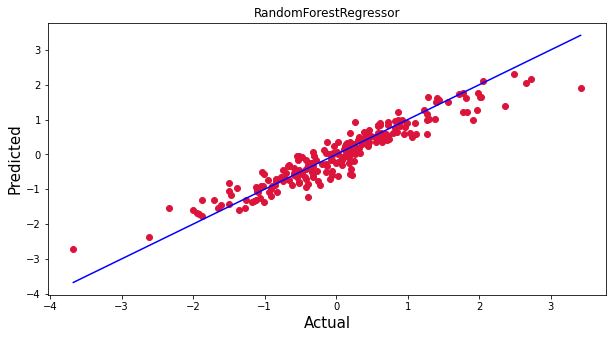

In [112]:
plt.figure(figsize=(10,5))
plt.scatter(Y_test, prediction, c='crimson')
p1 = max(max(prediction), max(Y_test))
p2 = min(min(prediction), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("RandomForestRegressor")
plt.show()

In [116]:
#Predicting Sale price of house using cleaned test dataset X_1
Predicted_Sale_Price=model.predict(X)
Predicted_Sale_Price

array([-0.49160679,  1.27577076,  1.12548921, ..., -0.25188367,
       -2.90761244,  0.27530178])

In [117]:
#Making dataframe for predicted SalePrice
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

SalePrice
0  -0.491607
1   1.275771
2   1.125489
3   0.463405
4   0.670376
5   0.808376
6  -0.500187
7   0.037161
8  -0.388150
9  -0.877809

In [118]:
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)